In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
data = df

In [3]:
df.head(100)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No,19.49,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Excellent,7.0,Yes,No,No
96,No,24.02,No,No,No,0.0,14.0,No,Female,70-74,White,No,Yes,Very good,7.0,No,No,Yes
97,No,28.35,Yes,No,No,20.0,0.0,No,Female,65-69,White,No,No,Very good,8.0,No,No,No
98,No,24.37,No,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,7.0,Yes,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

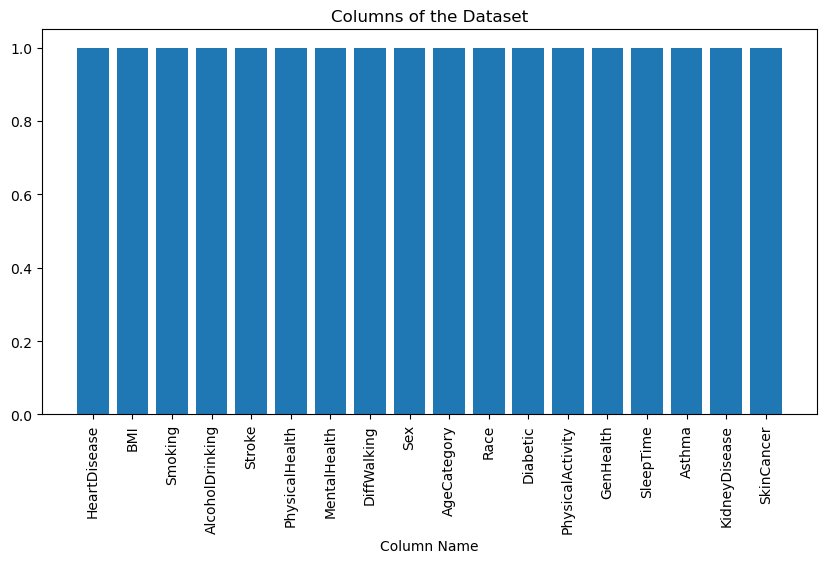

In [6]:
# set the figure size
plt.figure(figsize=(10, 5))

# create a bar plot of column names
plt.bar(x=df.columns, height=[1] * len(df.columns))

# set the title and axis labels
plt.title("Columns of the Dataset")
plt.xlabel("Column Name")
plt.ylabel("")

# rotate x-axis labels for better readability
plt.xticks(rotation=90)

# display the plot
plt.show()

In [7]:
#checking the frequency counts of variables.
for col in data.columns:
    print(f"""
###########################################################################################
The values of {col} is : 
{data[col].value_counts().sort_index()}
###########################################################################################""")


###########################################################################################
The values of HeartDisease is : 
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
###########################################################################################

###########################################################################################
The values of BMI is : 
12.02    2
12.08    1
12.13    1
12.16    1
12.20    1
        ..
92.53    1
93.86    1
93.97    1
94.66    1
94.85    1
Name: BMI, Length: 3604, dtype: int64
###########################################################################################

###########################################################################################
The values of Smoking is : 
No     187887
Yes    131908
Name: Smoking, dtype: int64
###########################################################################################

###################################################################################

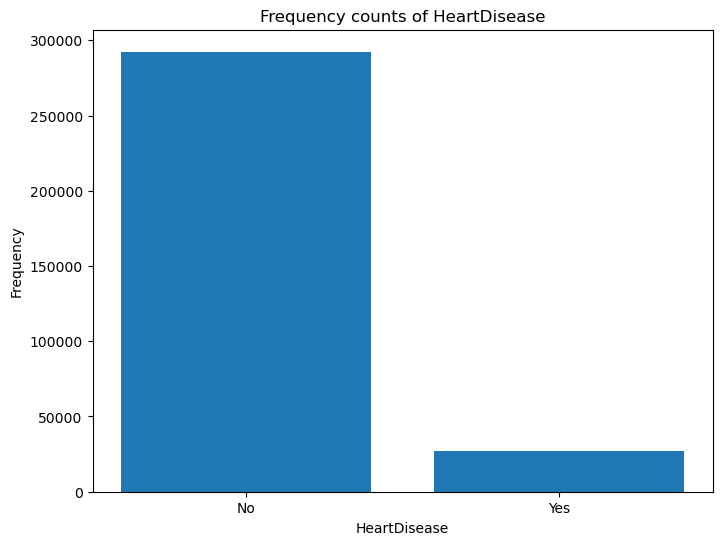

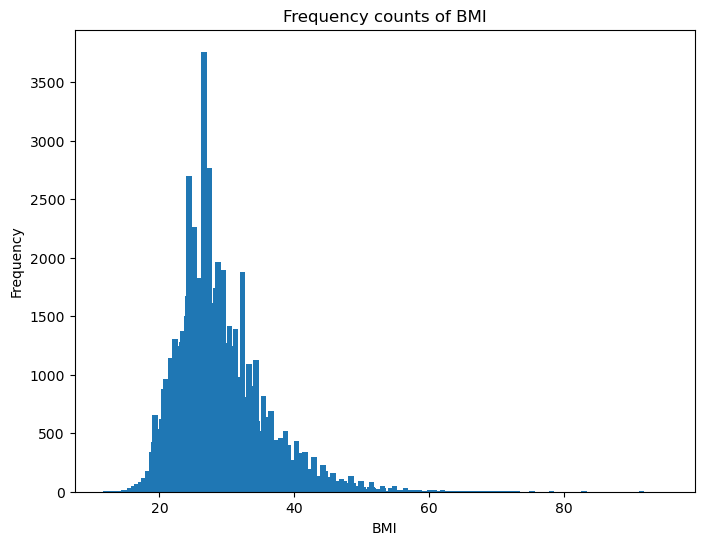

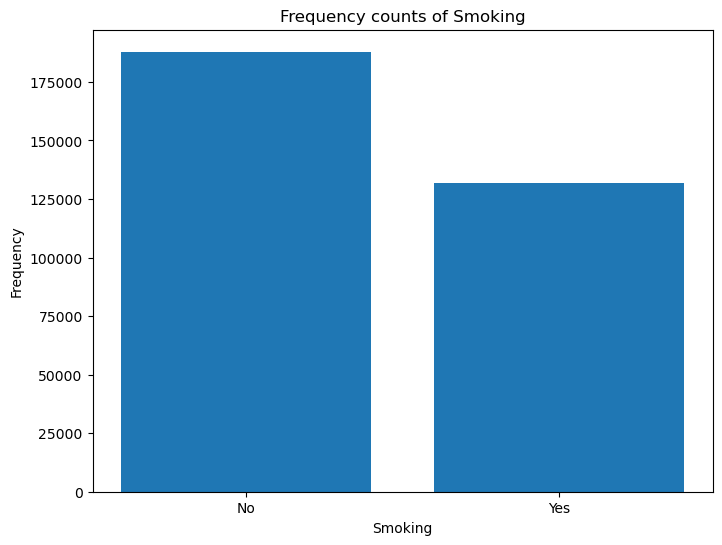

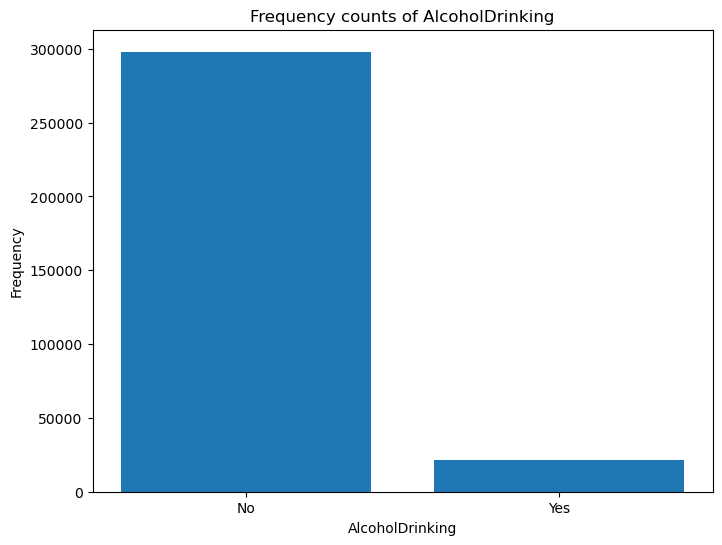

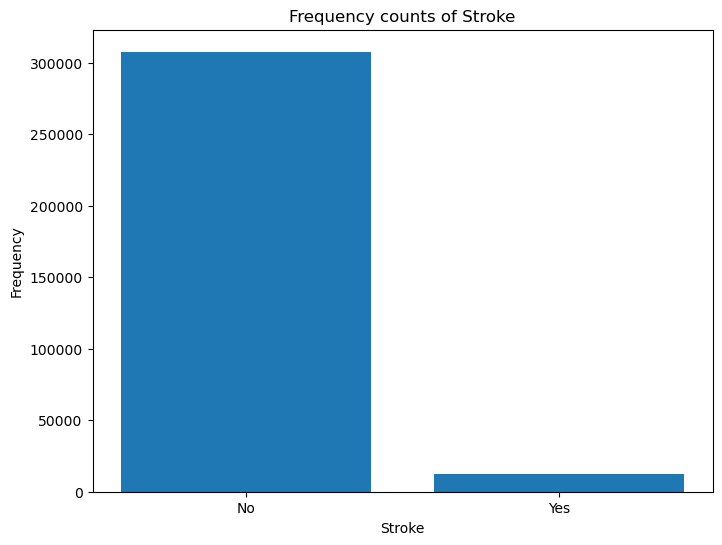

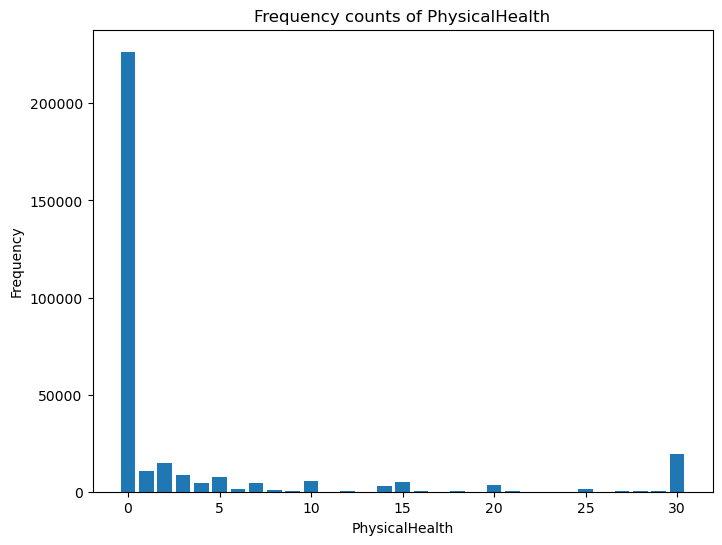

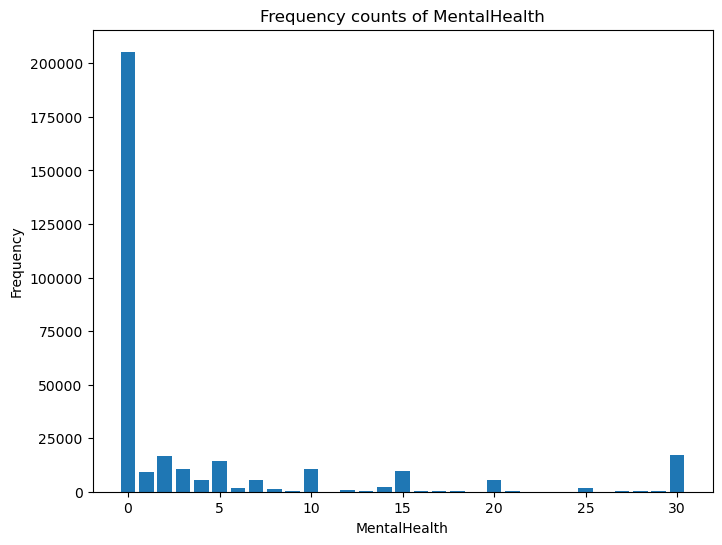

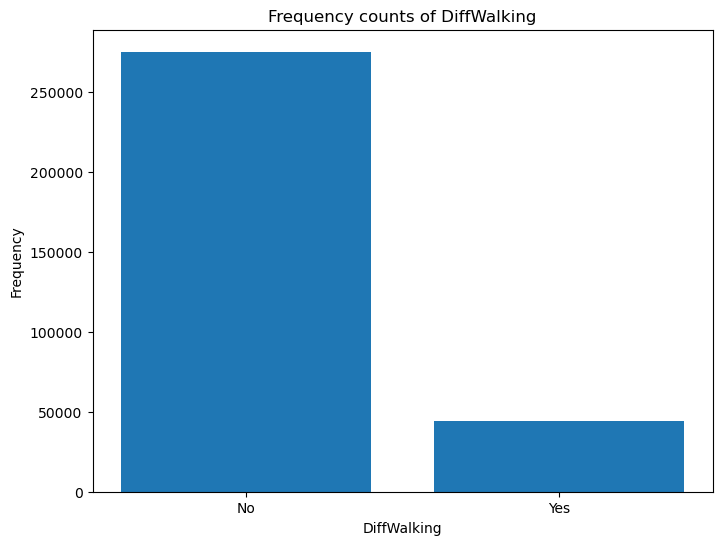

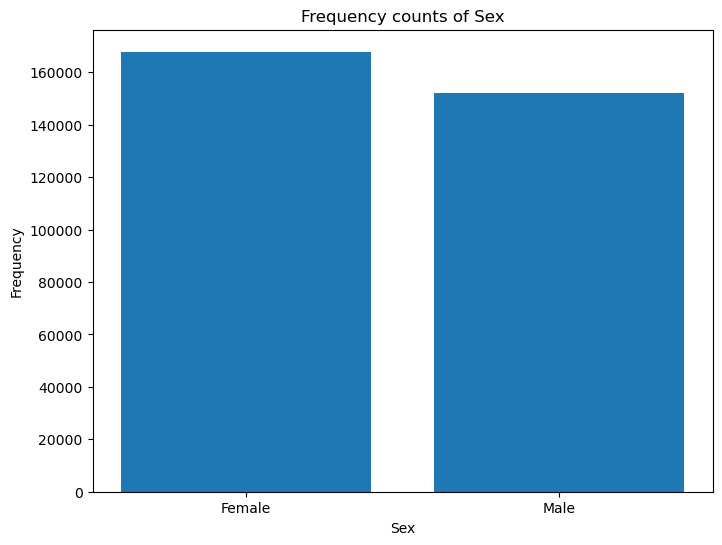

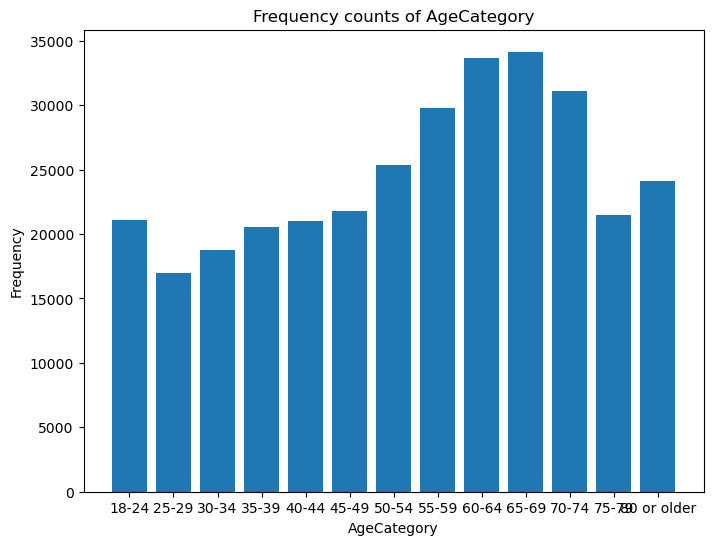

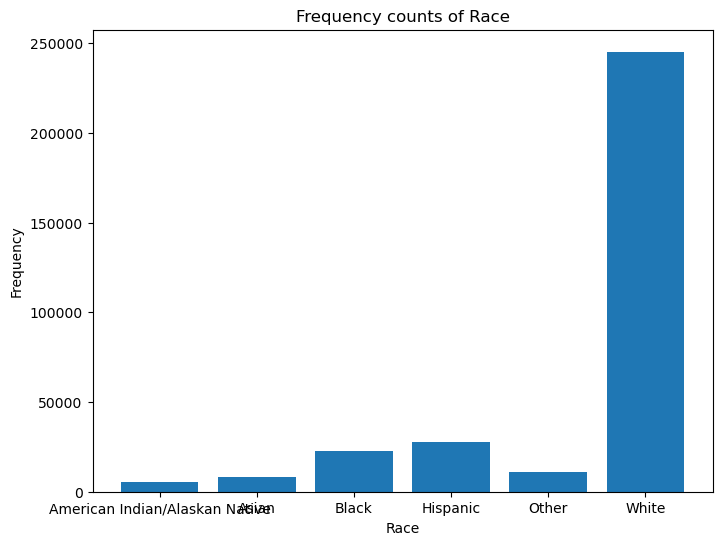

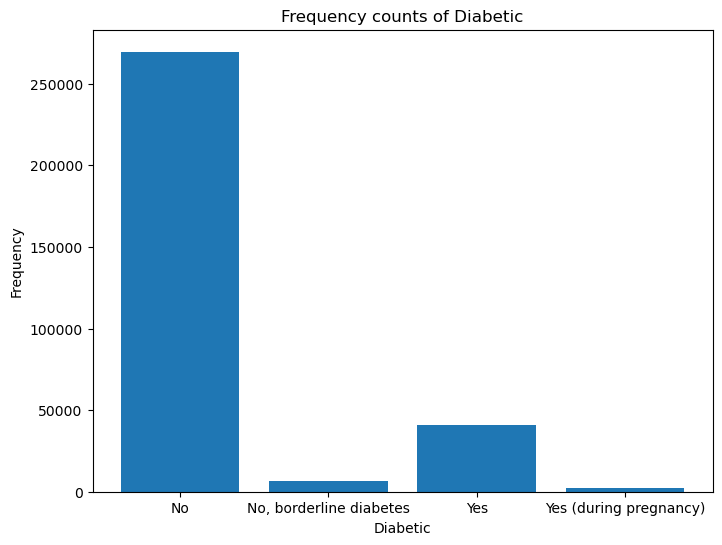

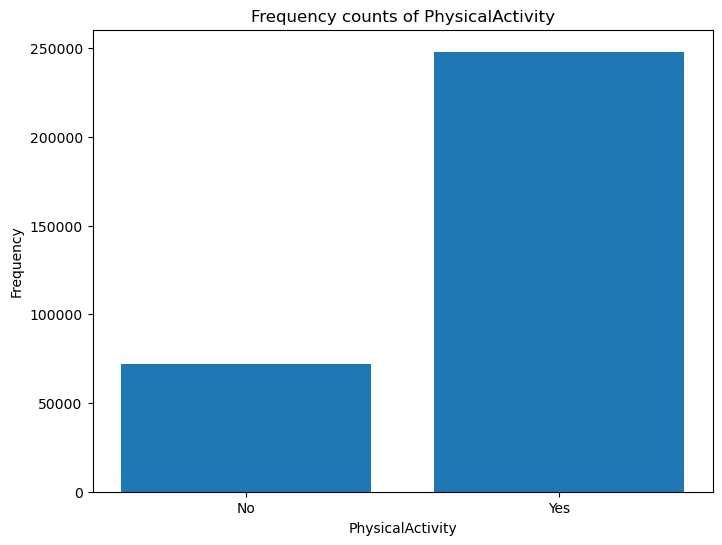

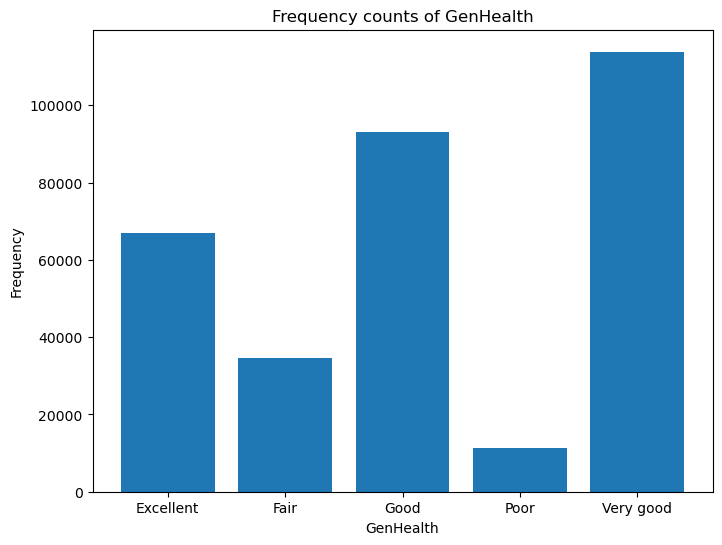

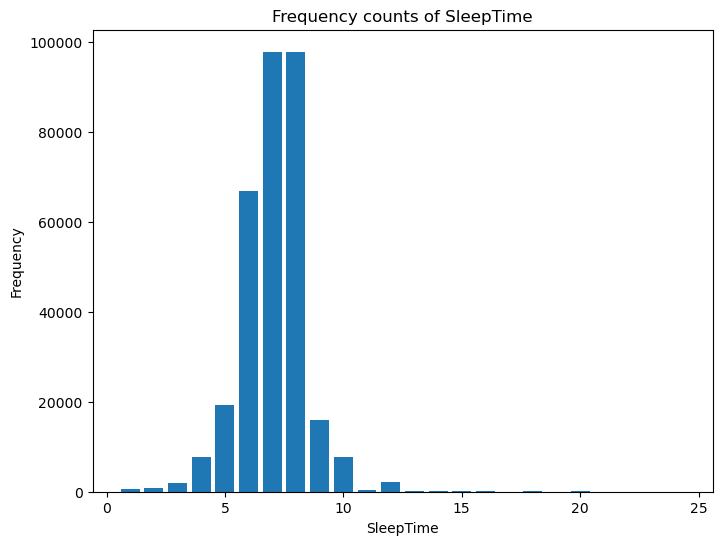

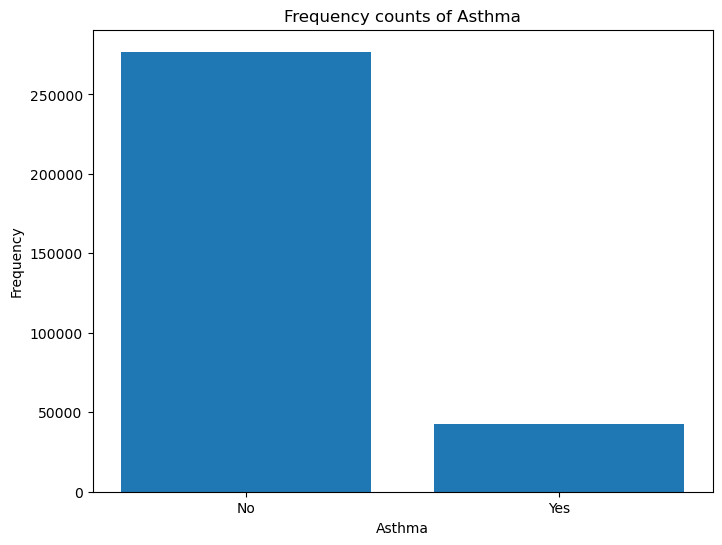

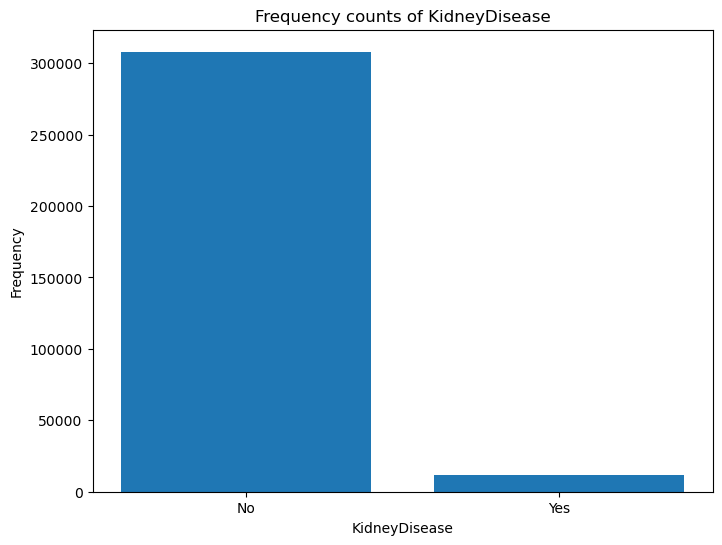

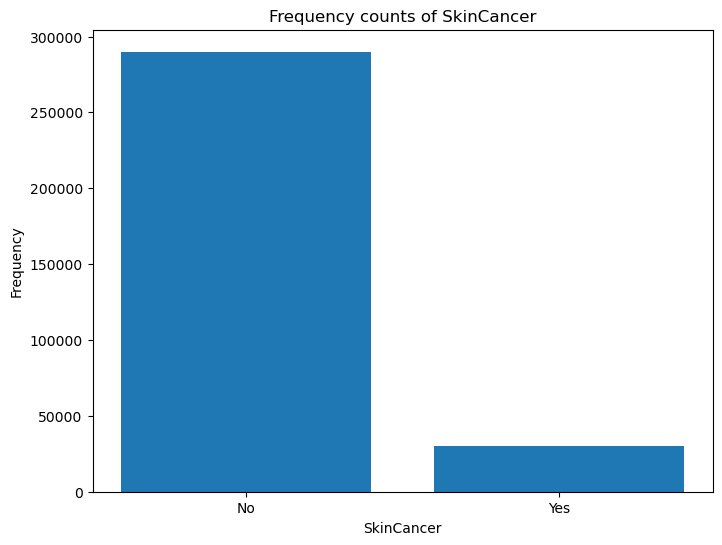

In [8]:
#checking the frequency counts of variables.
for col in data.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(data[col].value_counts().sort_index().index, data[col].value_counts().sort_index().values)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency counts of {col}')
    plt.show()

In [9]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
data.groupby("HeartDisease")['Sex'].value_counts(normalize=True) * 100

HeartDisease  Sex   
No            Female    53.542825
              Male      46.457175
Yes           Male      58.959559
              Female    41.040441
Name: Sex, dtype: float64

In [11]:
data.groupby("Smoking")['Sex'].value_counts(normalize=True) * 100

Smoking  Sex   
No       Female    56.031551
         Male      43.968449
Yes      Male      52.596507
         Female    47.403493
Name: Sex, dtype: float64

In [12]:
data.groupby("AlcoholDrinking")['Sex'].value_counts(normalize=True) * 100

AlcoholDrinking  Sex   
No               Female    52.529377
                 Male      47.470623
Yes              Female    51.696744
                 Male      48.303256
Name: Sex, dtype: float64

In [13]:
#First Row Show
df.iloc[0]

HeartDisease               No
BMI                      16.6
Smoking                   Yes
AlcoholDrinking            No
Stroke                     No
PhysicalHealth            3.0
MentalHealth             30.0
DiffWalking                No
Sex                    Female
AgeCategory             55-59
Race                    White
Diabetic                  Yes
PhysicalActivity          Yes
GenHealth           Very good
SleepTime                 5.0
Asthma                    Yes
KidneyDisease              No
SkinCancer                Yes
Name: 0, dtype: object

# Data Visualization

## What is the overall ratio of Heart Disease ?

C:\Users\Mena\AppData\Local\Temp\ipykernel_5324\3903939798.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


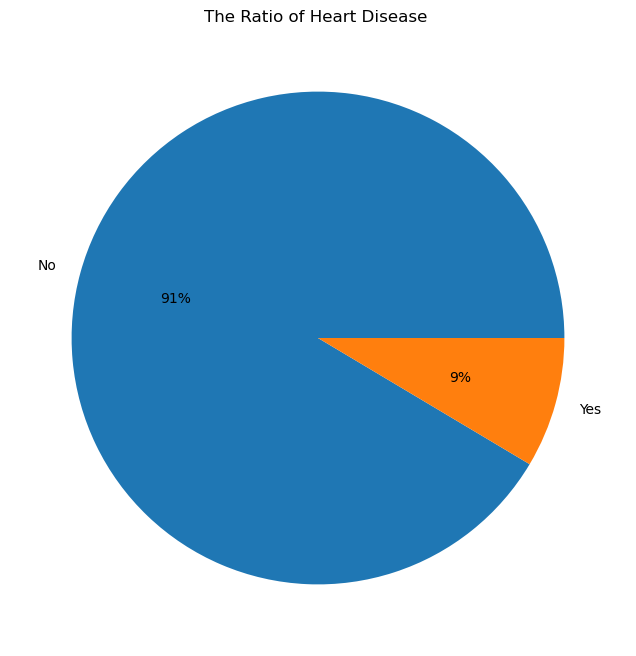

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.pie(data['HeartDisease'].value_counts(), autopct='%1.0f%%', labels=['No', "Yes"])
ax.set_title('The Ratio of Heart Disease ')
fig.show()

## What is the relation between heart disease, skin cancer & kidney disease Vs the age ?

In [15]:
encode_AgeCategory = {'55-59': 57, '80 or older': 80, '65-69': 67,
                      '75-79': 77, '40-44': 42, '70-74': 72, '60-64': 62,
                      '50-54': 52, '45-49': 47, '18-24': 21, '35-39': 37,
                      '30-34': 32, '25-29': 27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype('float')

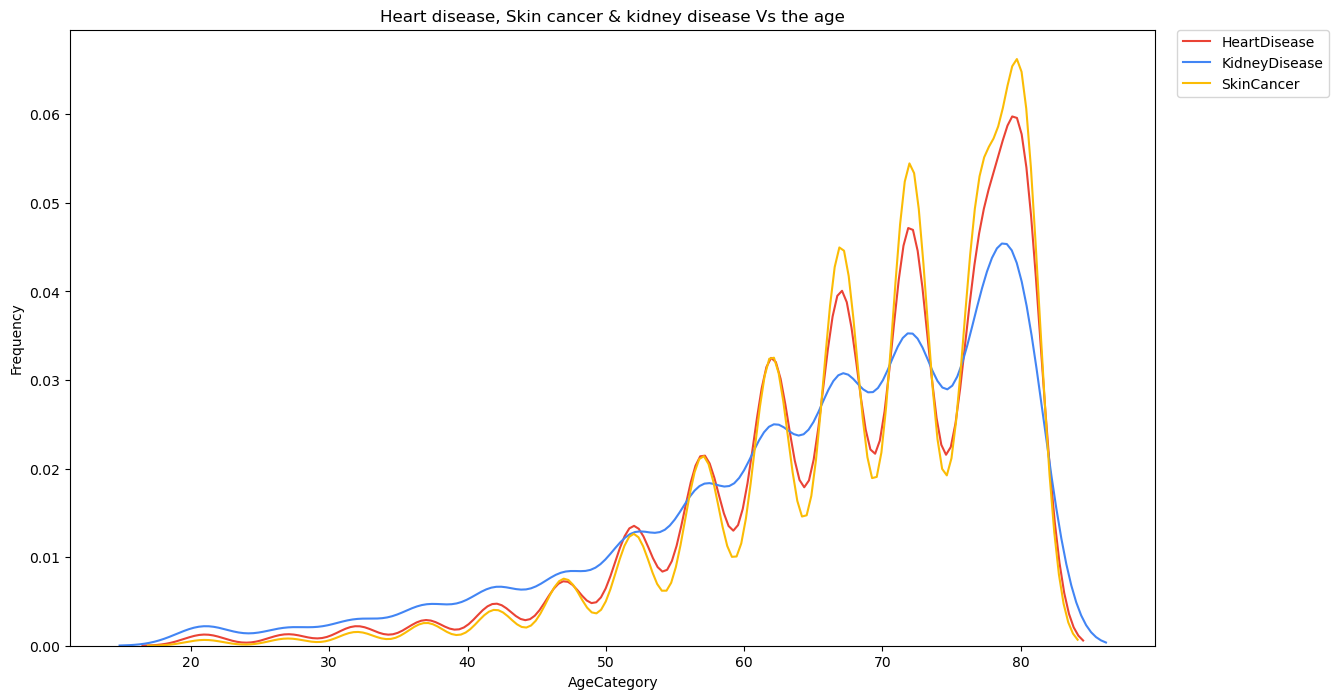

In [16]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.kdeplot(data[data["HeartDisease"] == 'Yes']["AgeCategory"], alpha=1, shade=False, color="#ea4335",
            label="HeartDisease", ax=ax)
sns.kdeplot(data[data["KidneyDisease"] == 'Yes']["AgeCategory"], alpha=1, shade=False, color="#4285f4",
            label="KidneyDisease", ax=ax)
sns.kdeplot(data[data["SkinCancer"] == 'Yes']["AgeCategory"], alpha=1, shade=False, color="#fbbc05", label="SkinCancer",
            ax=ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Heart disease, Skin cancer & kidney disease Vs the age')
plt.show()

### ==> People found to have heart disease, skin cancer & kidney disease are mostly old people

## The relation between Heart Disease & Sex

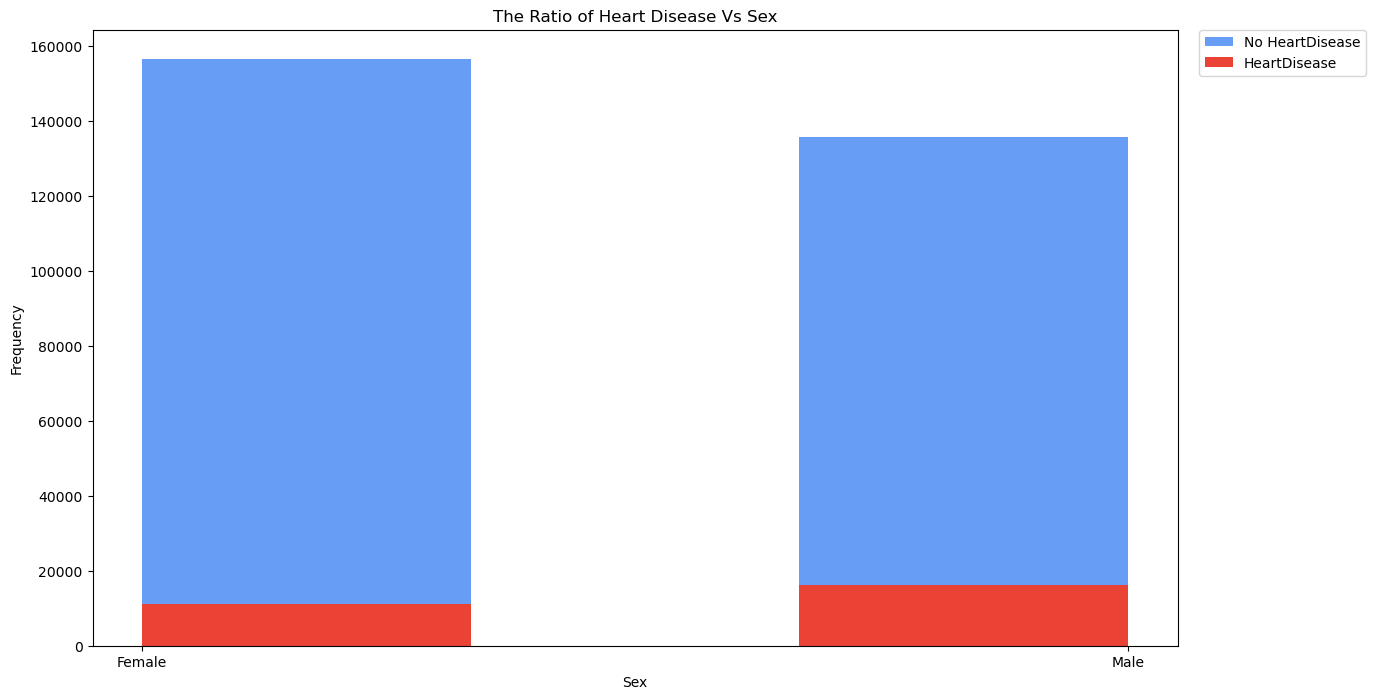

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.hist(data[data["HeartDisease"] == 'No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"] == 'Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")
plt.title('The Ratio of Heart Disease Vs Sex')
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [18]:
female_with_heart_disease = len(data[(data['HeartDisease'] == 'Yes') & (data['Sex'] == 'Female')])
num_female = len(data[data['Sex'] == 'Female'])
male_with_heart_disease = len(data[(data['HeartDisease'] == 'Yes') & (data['Sex'] == 'Male')])
num_male = len(data[data['Sex'] == 'Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease / num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease / num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


### ==> Most heart disease patients are Male than Females

### ==> More Females were tested than males

### ==> Males are approximately 1.6 times more likely to have heart disease than females

## What is the effect of smoking in Heart disease ?

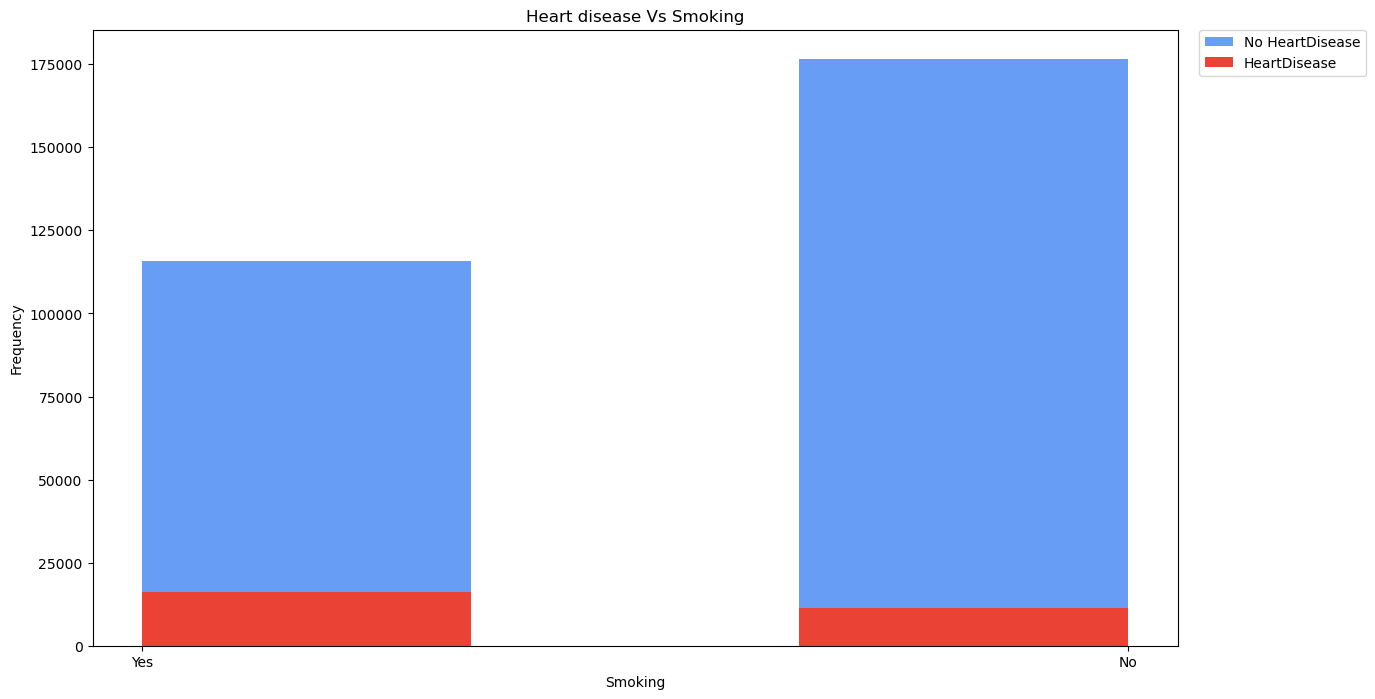

In [19]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.hist(data[data["HeartDisease"] == 'No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"] == 'Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Smoking')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [21]:
smoke_and_heart_disease = len(data[(data['HeartDisease'] == 'Yes') & (data['Smoking'] == 'Yes')])
num_smoke = len(data[data['Smoking'] == 'Yes'])
no_smoke_and_heart_disease = len(data[(data['HeartDisease'] == 'Yes') & (data['Smoking'] == 'No')])
num_no_smoke = len(data[data['Smoking'] == 'No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease / num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease / num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


### ==> Most heart disease patients smoke

### ==> People who smoke are approximately twice as likely to have heart disease than people who don't smoke

## What is the relation of Heart disease Vs the race ?

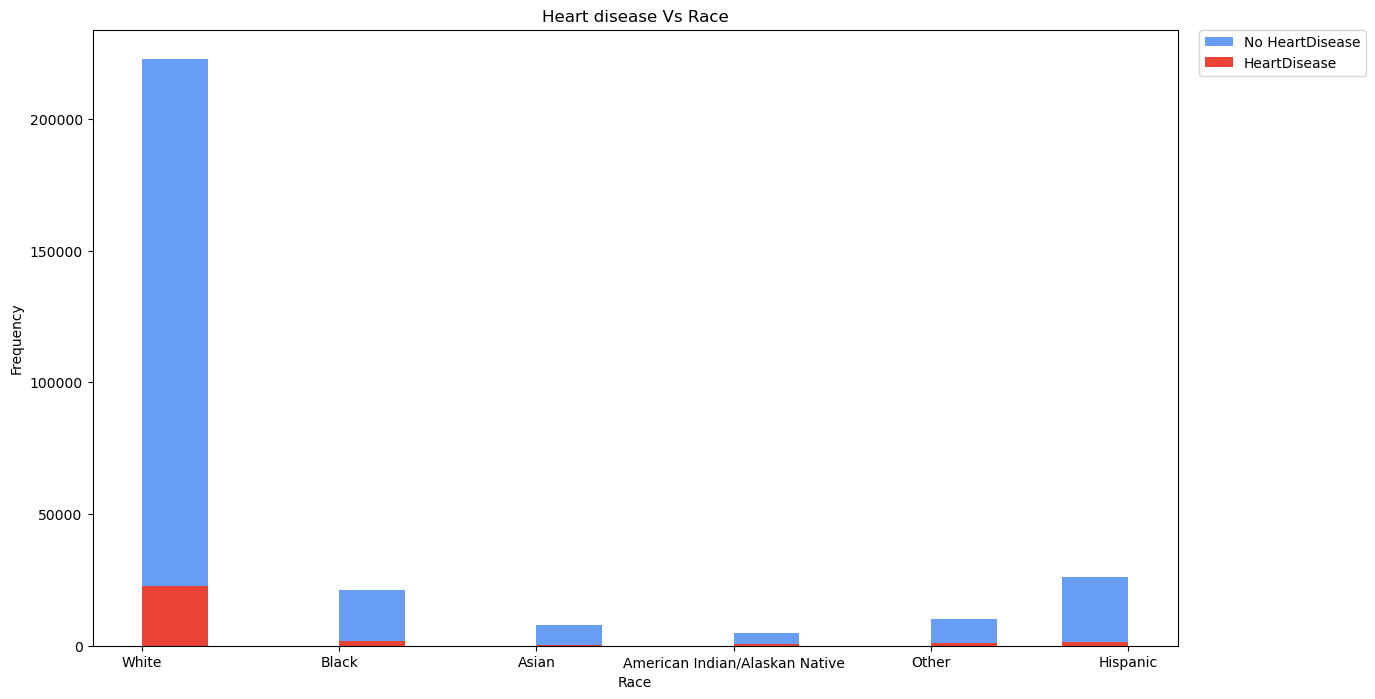

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.hist(data[data["HeartDisease"] == 'No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"] == 'Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Race')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

### ==> Most Heart Disease Patients are White people

## does the general health affect to Heart disease ?

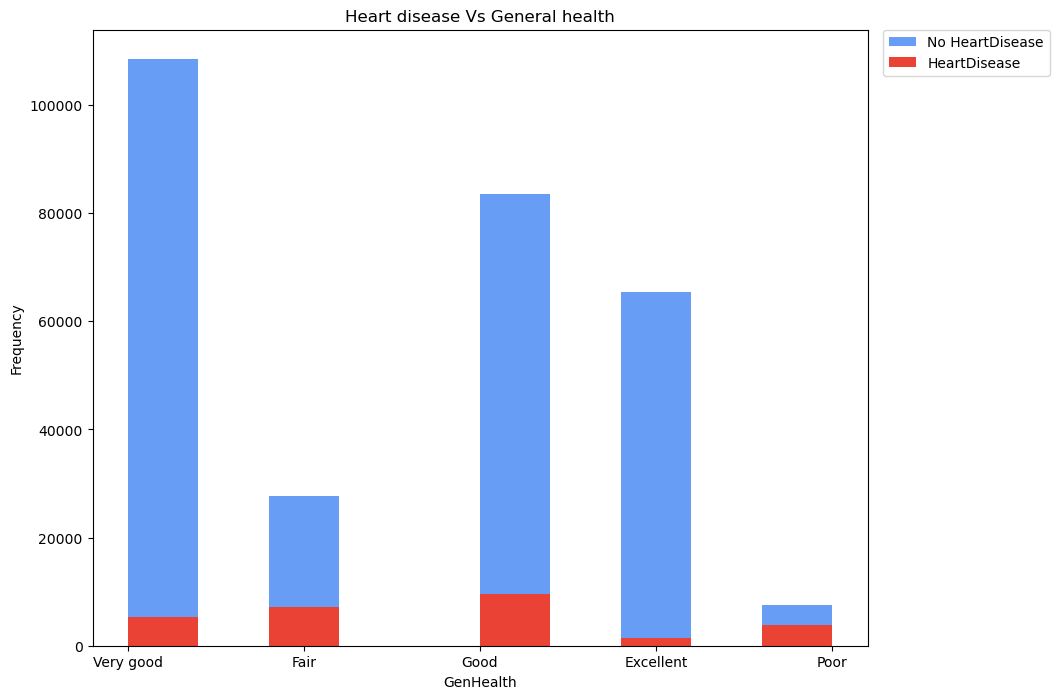

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(data[data["HeartDisease"] == 'No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"] == 'Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs General health')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

### ==> Most poor general health Patients have high heart Disease

## What is the relation of Heart disease & BMI

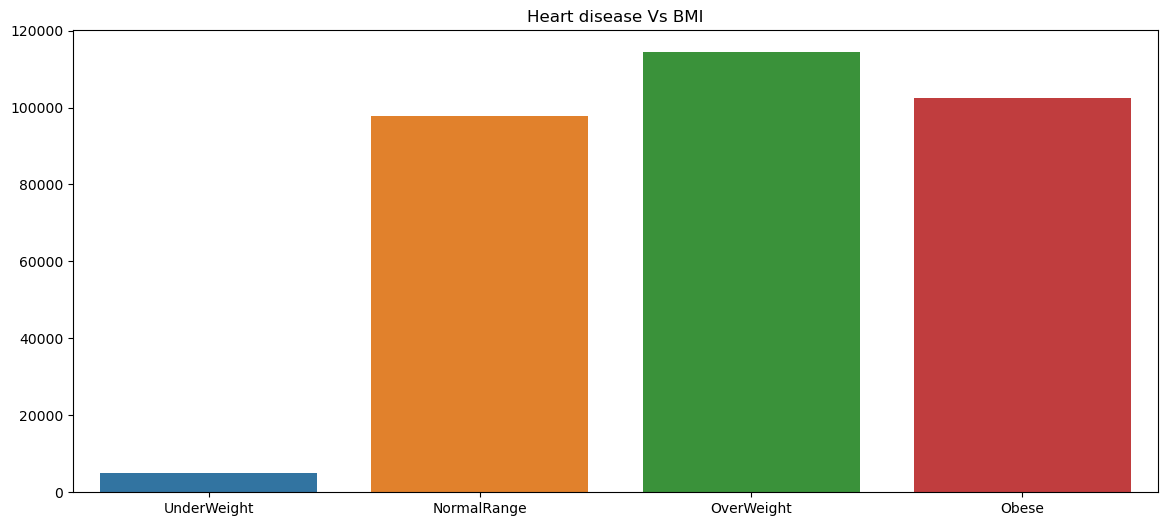

In [24]:
# classification of BMI (Body Mass Index) by ranges :
BMI_UnderWeight = data['BMI'][(data['BMI'] >= 0) & (data['BMI'] <= 18.5)]
BMI_NormalRange = data['BMI'][(data['BMI'] > 18.5) & (data['BMI'] <= 25)]
BMI_OverrWeight = data['BMI'][(data['BMI'] > 25) & (data['BMI'] <= 30)]
BMI_Obese = data['BMI'][(data['BMI'] > 30)]

BMI_X = ['UnderWeight', 'NormalRange', 'OverWeight', 'Obese']
BMI_Y = [len(BMI_UnderWeight.values), len(BMI_NormalRange.values), len(BMI_OverrWeight.values), len(BMI_Obese.values)]

plt.figure(figsize=(14, 6))
sns.barplot(x=BMI_X, y=BMI_Y)
plt.title('Heart disease Vs BMI')
plt.show()


<AxesSubplot:>

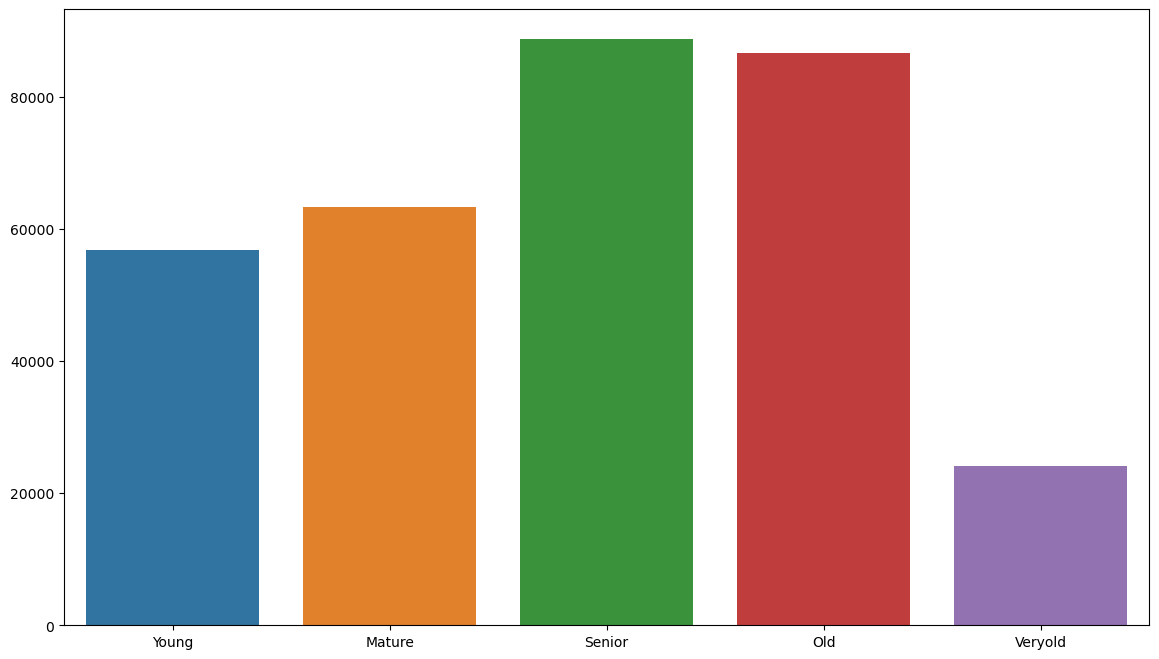

In [25]:
# classification of Age Category by ranges :
Young = data['AgeCategory'][(data['AgeCategory'] <= 32.0)]
Mature = data['AgeCategory'][(data['AgeCategory'] >= 37.0) & (data['AgeCategory'] <= 47.0)]
Senior = data['AgeCategory'][(data['AgeCategory'] >= 52.0) & (data['AgeCategory'] <= 62.0)]
Old = data['AgeCategory'][(data['AgeCategory'] >= 67.0) & (data['AgeCategory'] <= 77.0)]
Veryold = data['AgeCategory'][(data['AgeCategory'] == 80.0)]

Age_X = ['Young', 'Mature', 'Senior', 'Old', 'Veryold']
Age_Y = [len(Young.values), len(Mature.values), len(Senior.values), len(Old.values), len(Veryold.values)]

plt.figure(figsize=(14, 8))
sns.barplot(x=Age_X, y=Age_Y)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

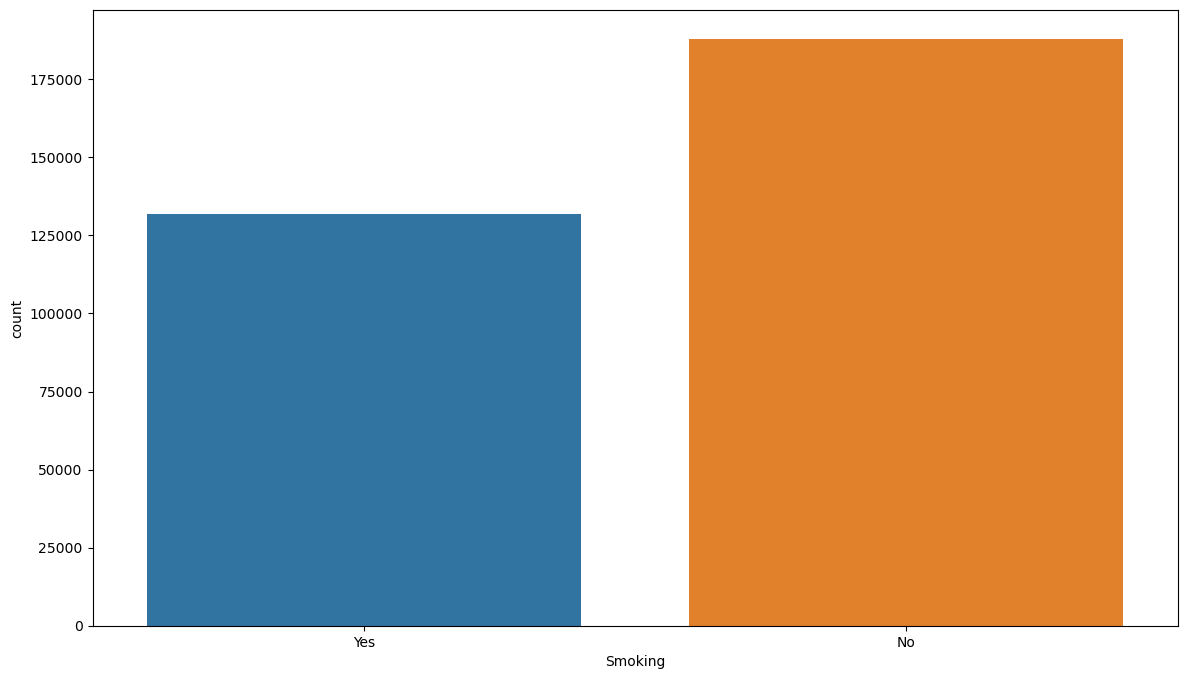

In [26]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Smoking")

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

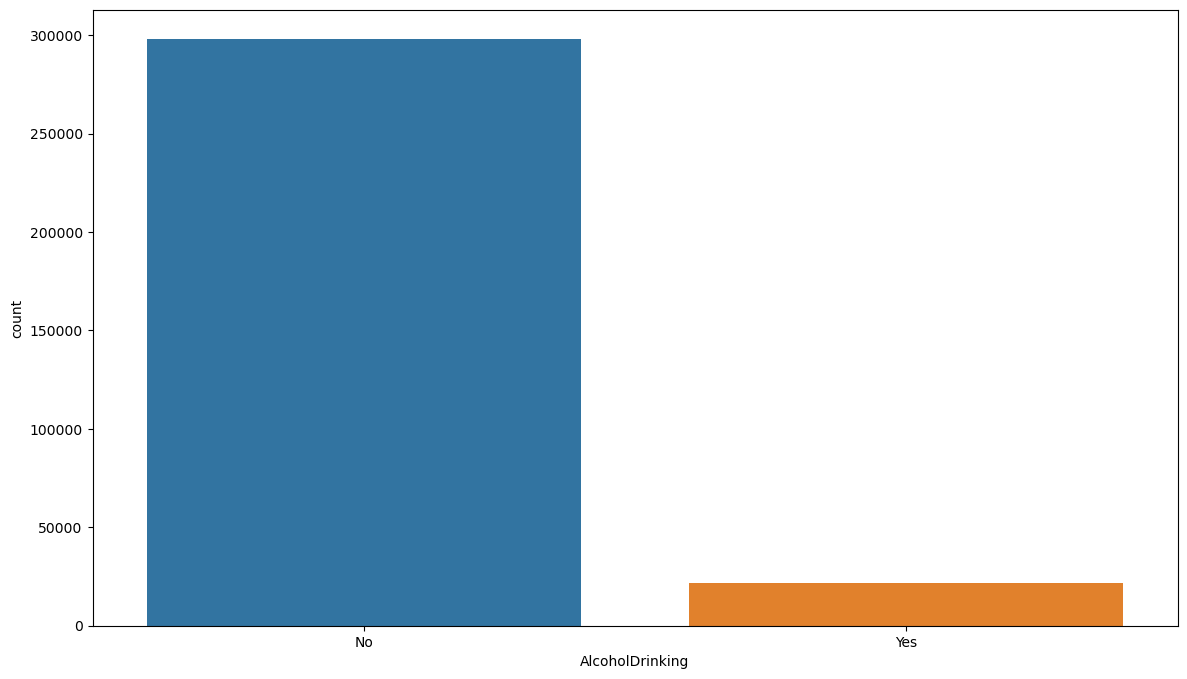

In [27]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="AlcoholDrinking")

<AxesSubplot:xlabel='Stroke', ylabel='count'>

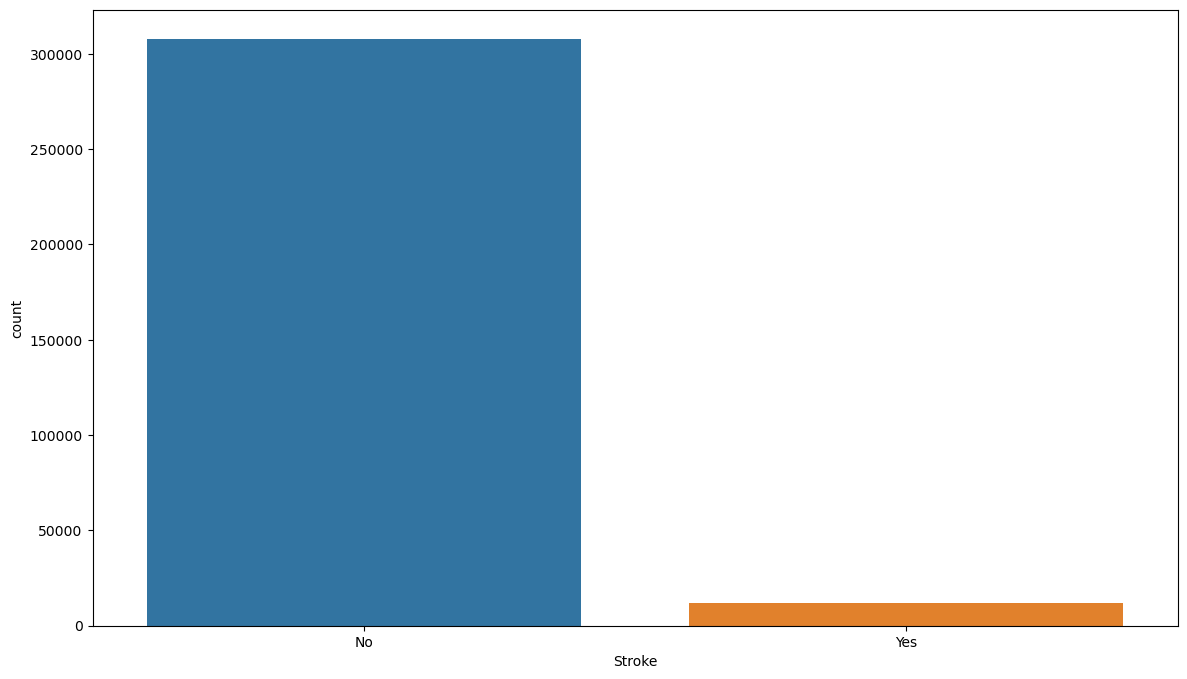

In [28]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Stroke")

<AxesSubplot:xlabel='Sex', ylabel='count'>

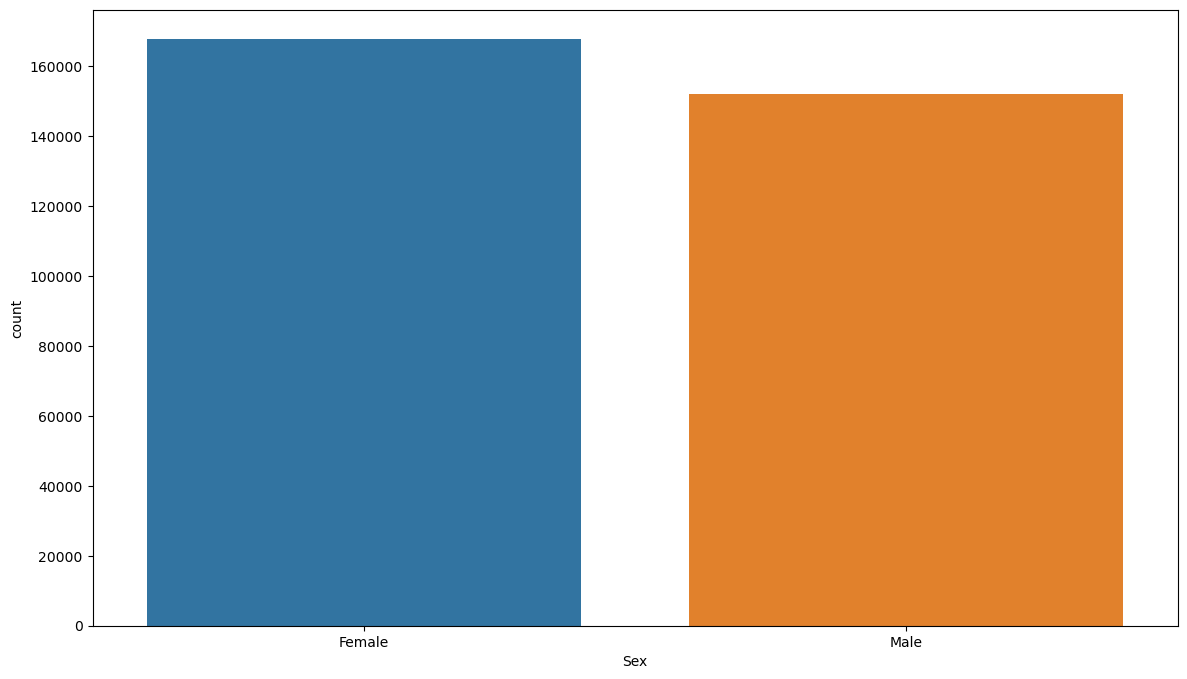

In [29]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Sex")

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

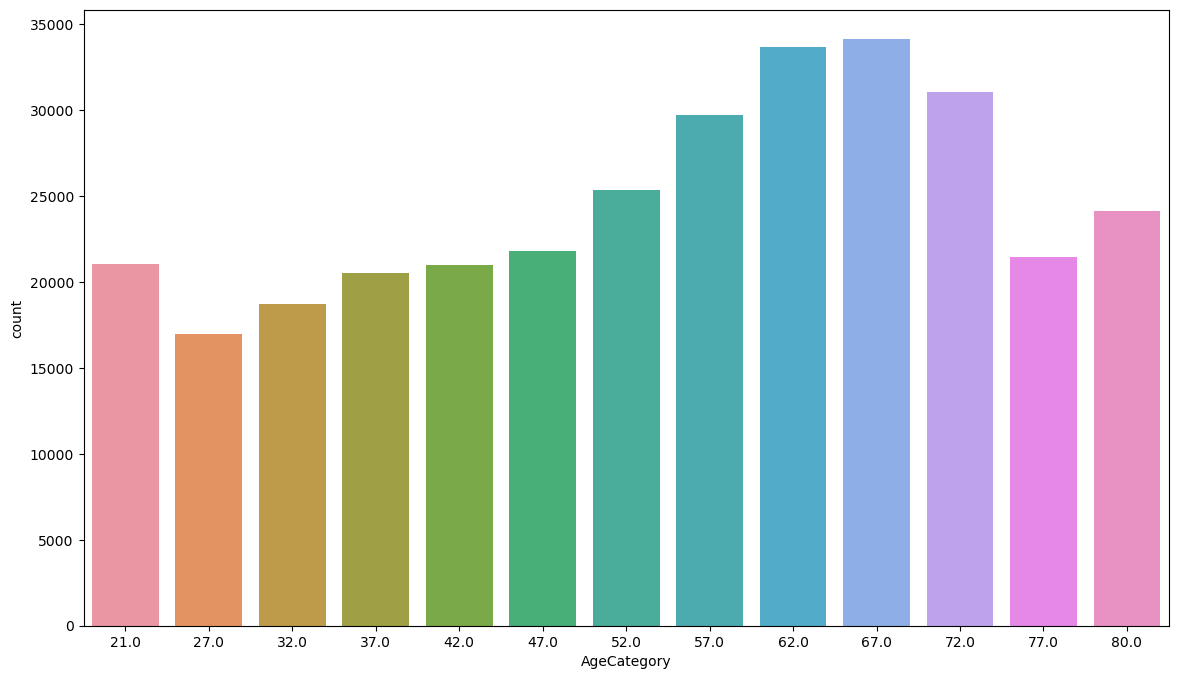

In [30]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="AgeCategory")
# 20          21064
# 27          16955
# 32          18753
# 37          20550
# 42          21006
# 47          21791
# 52          25382
# 57          29757
# 62          33686
# 67          34151
# 72          31065
# 77          21482
# 80          24153

<AxesSubplot:xlabel='Race', ylabel='count'>

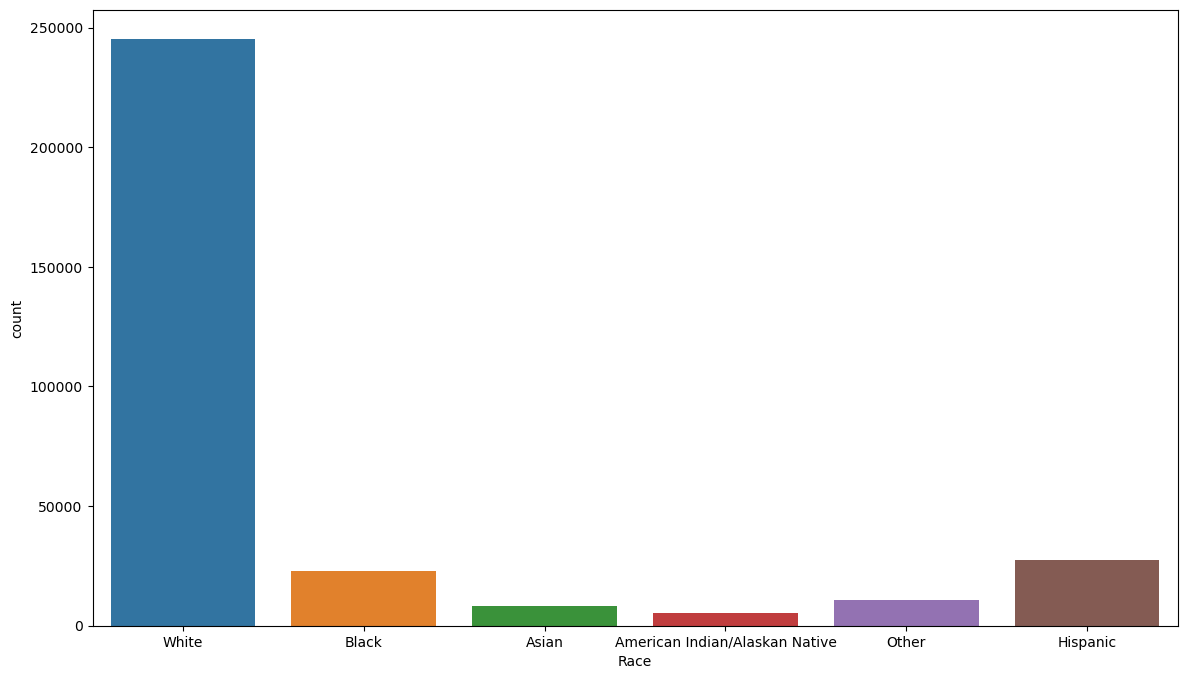

In [31]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Race")
# American Indian/Alaskan Native      5202
# Asian                               8068
# Black                              22939
# Hispanic                           27446
# Other                              10928
# White                             245212

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

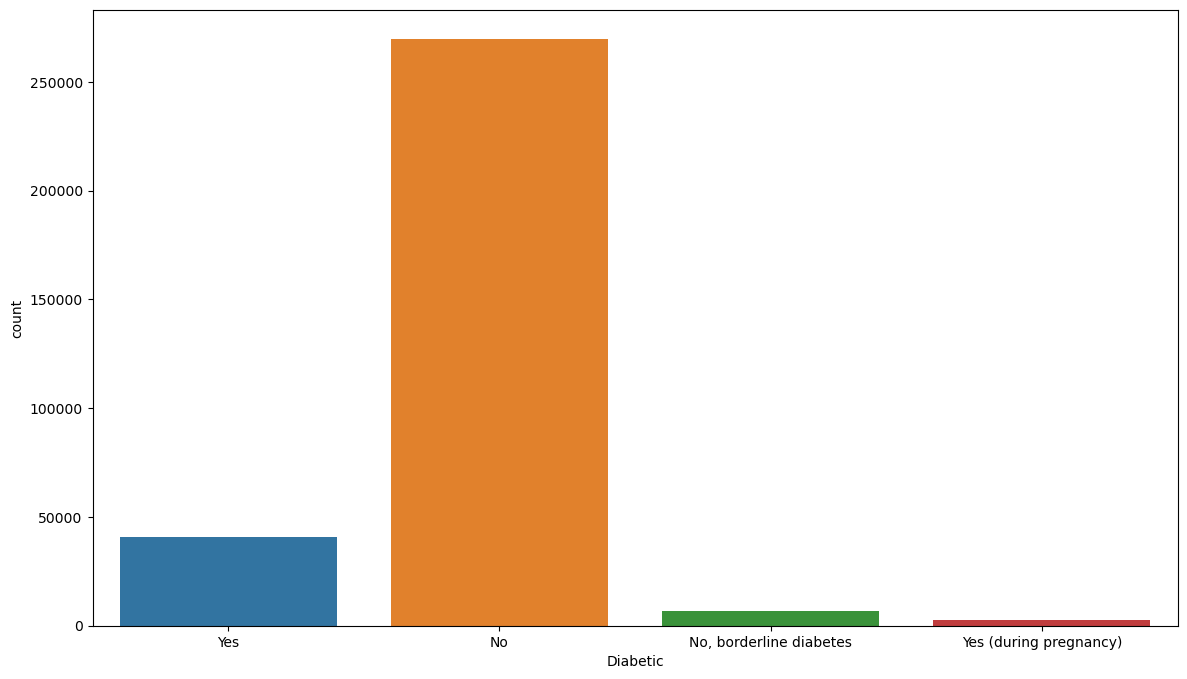

In [32]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Diabetic")
# ==> No                               5202
# ==> No, borderline diabetes          8068
# ==> Yes                              22939
# ==> Yes (during pregnancy)           27446

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

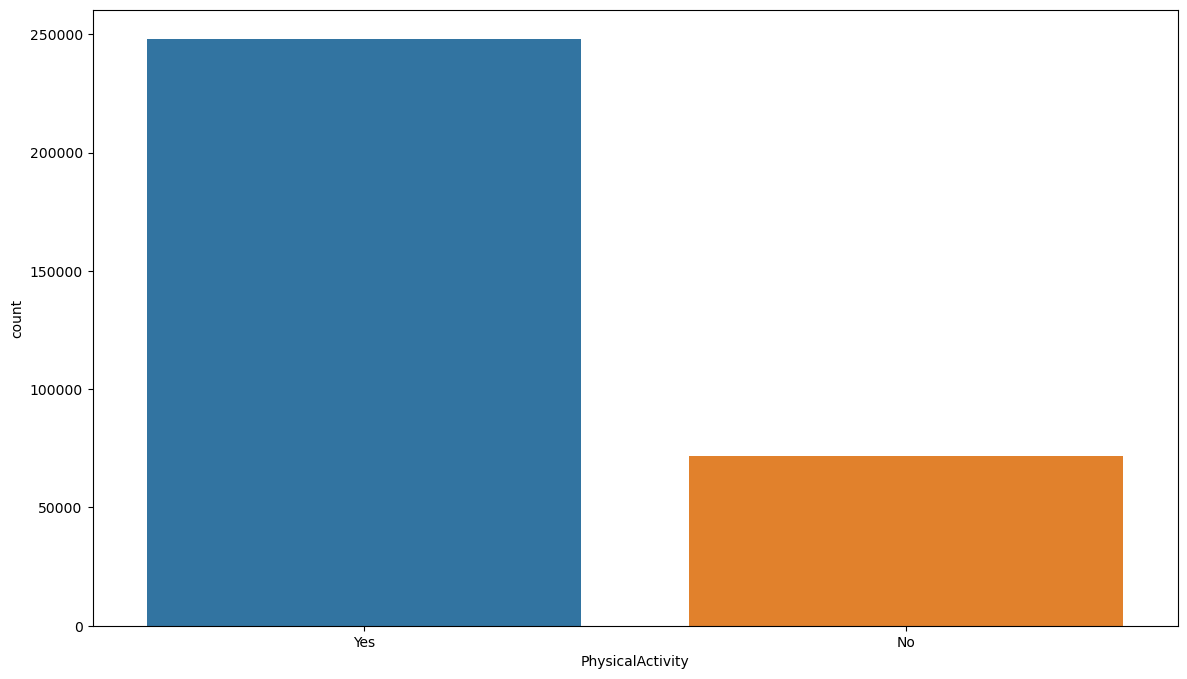

In [33]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="PhysicalActivity")
#==> No      71838
#==> Yes    247957

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

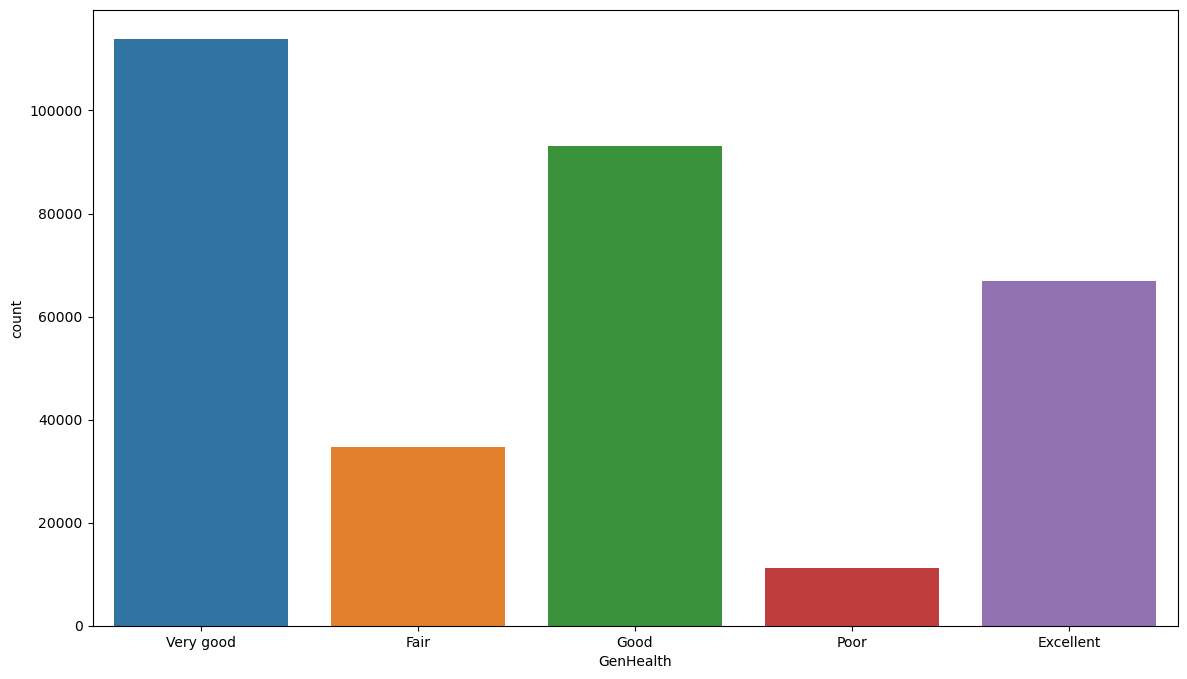

In [34]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="GenHealth")
#Excellent     66842
#Fair          34677
#Good          93129
#Poor          11289
#Very good    113858

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

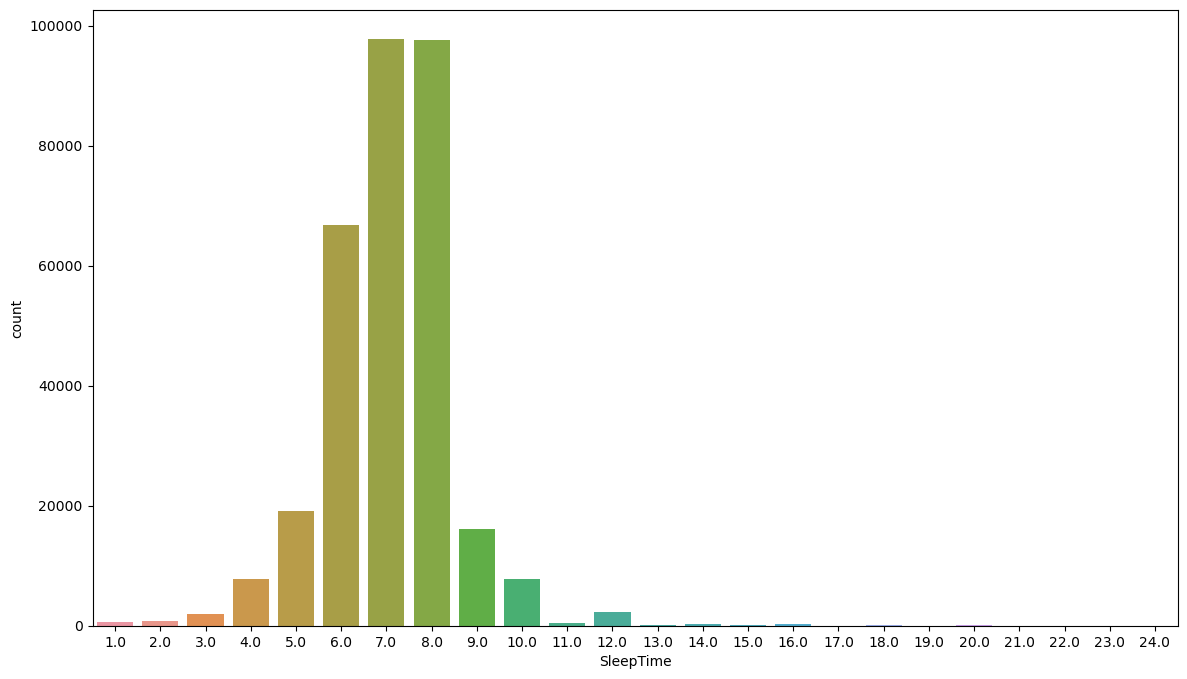

In [35]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="SleepTime")

<AxesSubplot:xlabel='Asthma', ylabel='count'>

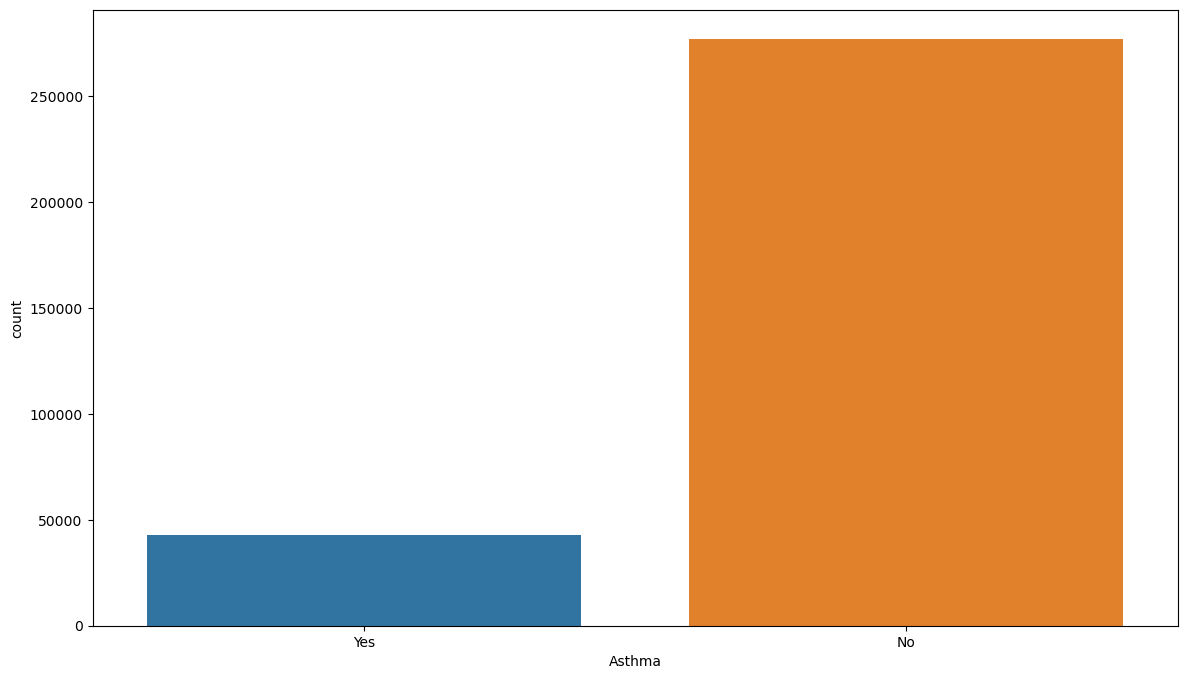

In [36]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Asthma")

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

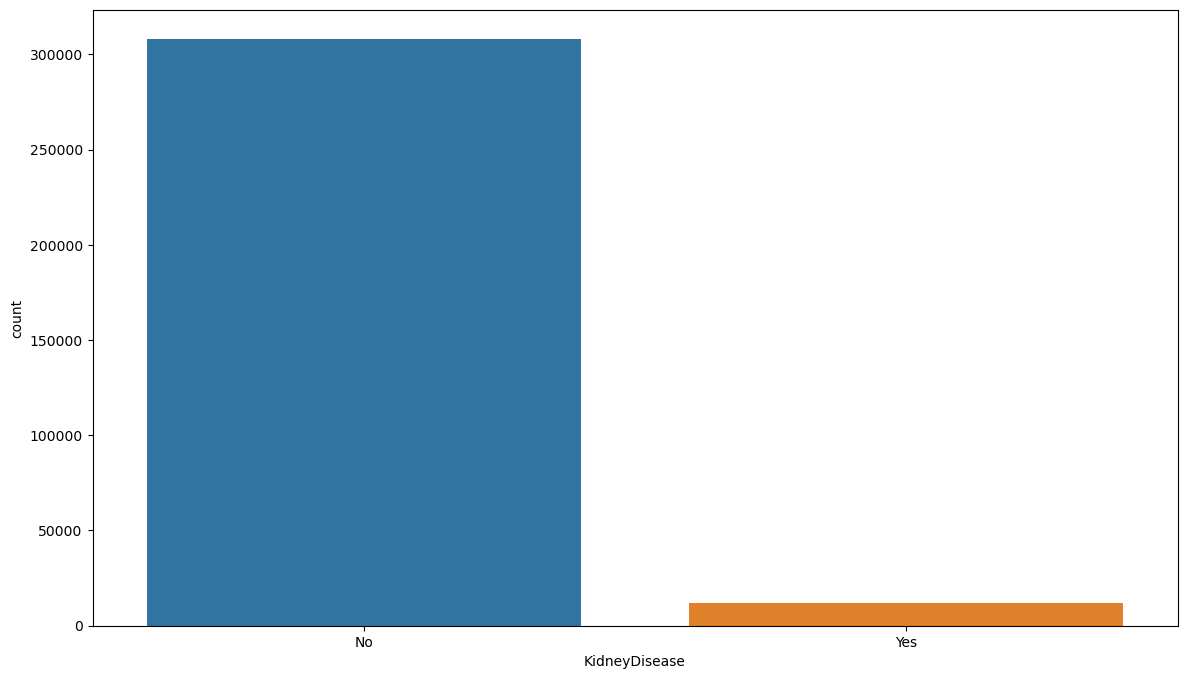

In [37]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="KidneyDisease")

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

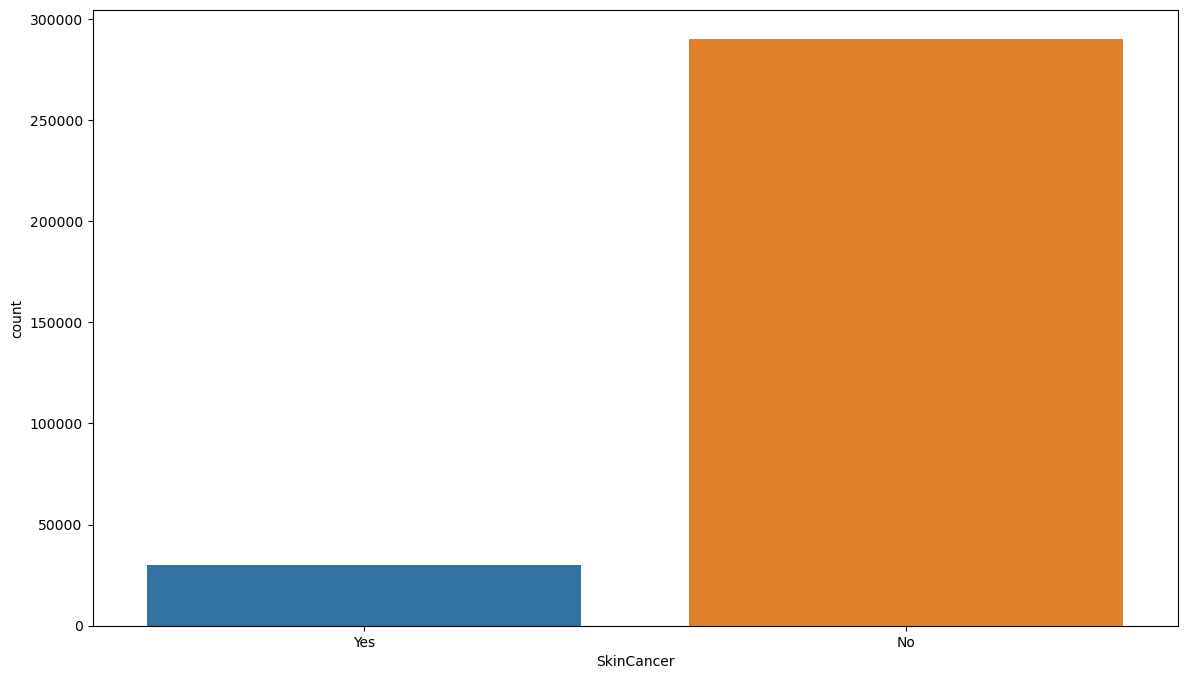

In [38]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="SkinCancer")

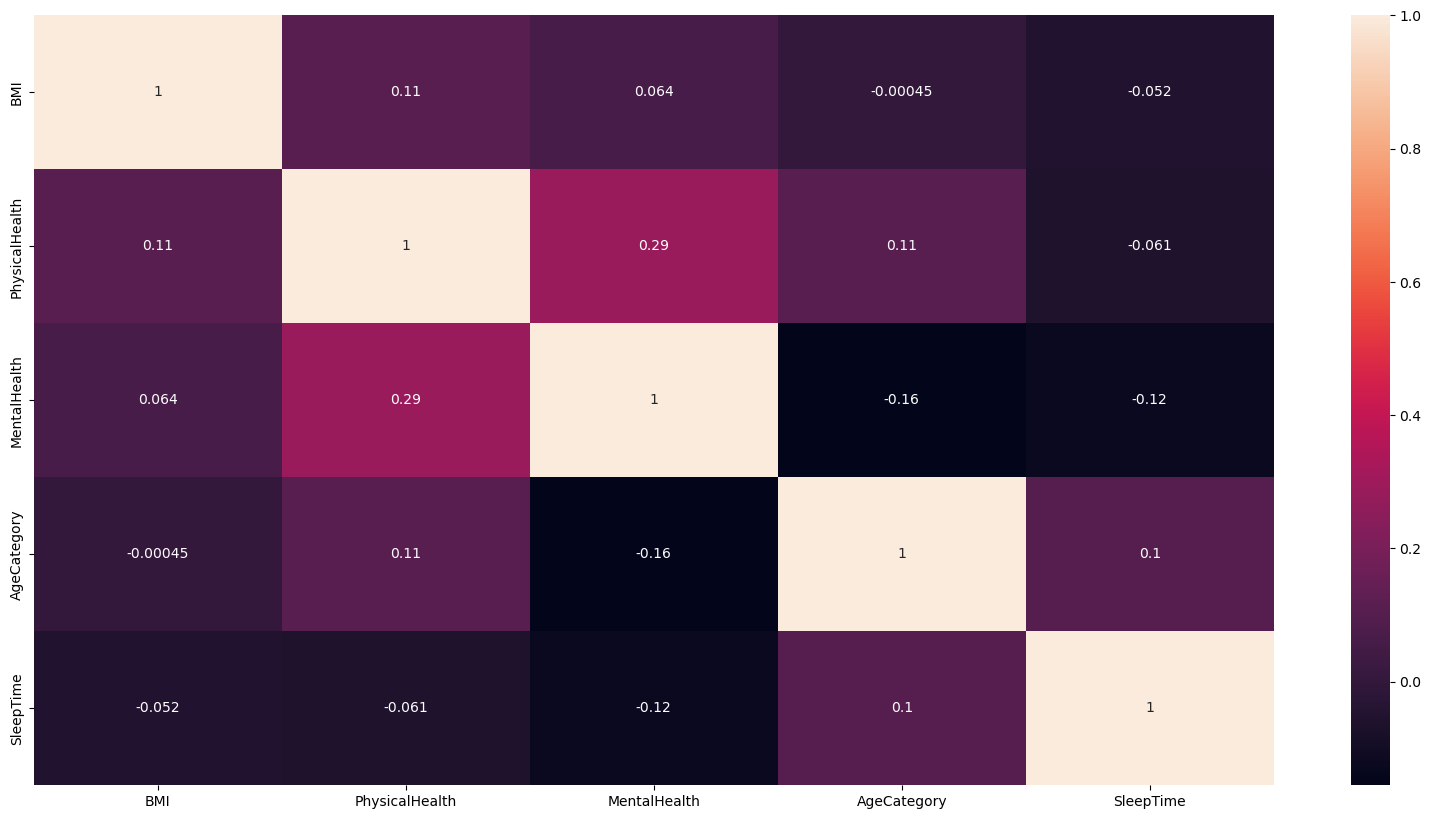

In [39]:
plt.figure(1, figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

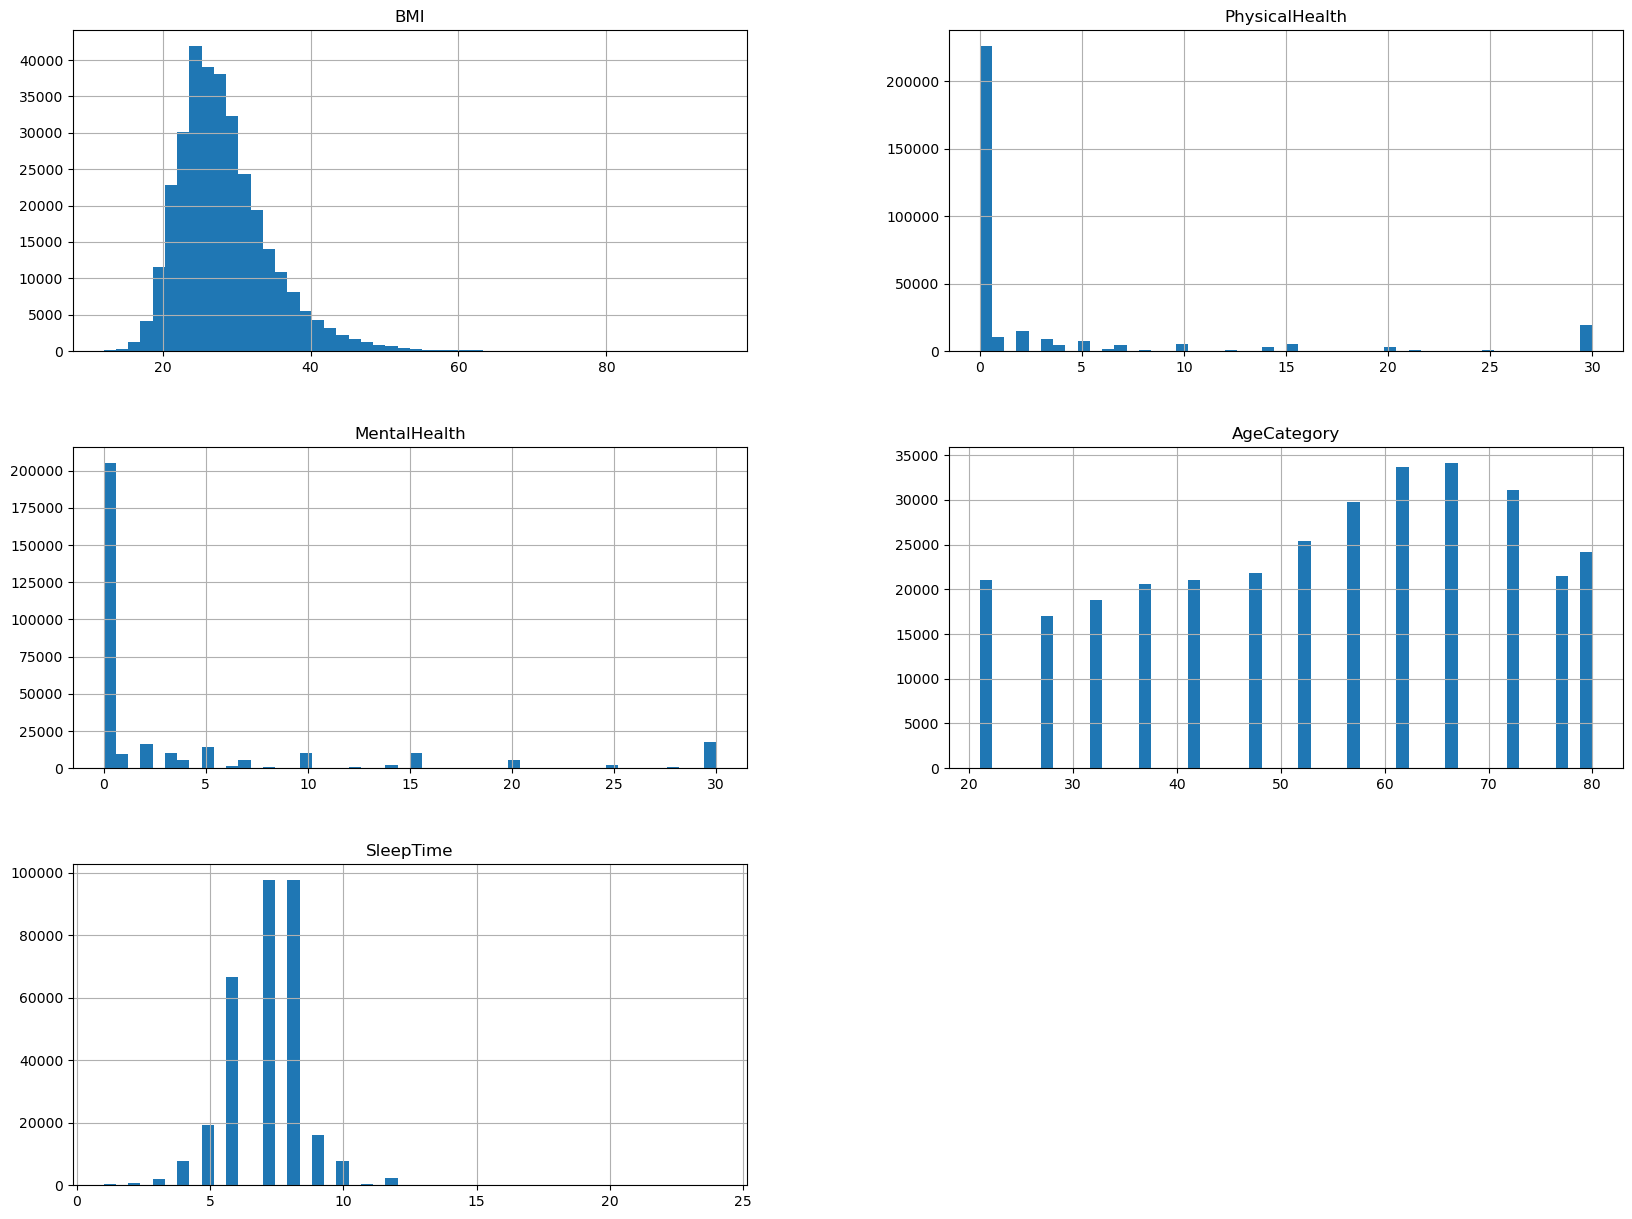

In [40]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

# Converting catergical data to numerical

In [41]:
cat_columns = df.select_dtypes(['object']).columns
cat_columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [42]:
df_1 = pd.get_dummies(df, columns=cat_columns[1:])

df_1['HeartDisease'].replace({'Yes': 1, 'No': 0}, inplace=True)

df_1.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,57.0,5.0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,80.0,7.0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,67.0,8.0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,77.0,6.0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,42.0,8.0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0


In [44]:
from sklearn import preprocessing

X = df_1.drop('HeartDisease', axis=1)
y = df_1['HeartDisease']

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# to balancing the heart disease results

In [45]:
from imblearn.over_sampling import SMOTE

over = SMOTE(k_neighbors=2000)
X, y = over.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, stratify=y)

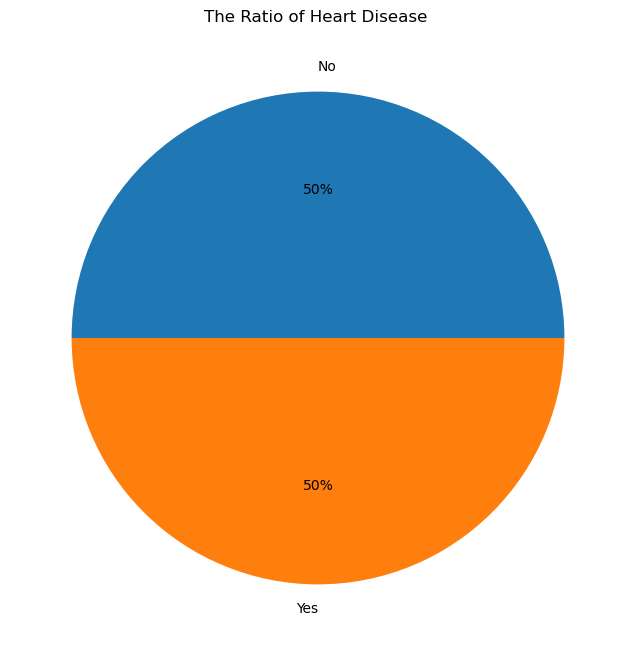

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.pie(y.value_counts(), autopct='%1.0f%%', labels=['No', "Yes"])
ax.set_title('The Ratio of Heart Disease ')
plt.show()

# Modelling

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [48]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=44, max_depth=20),
    "Logistic R.": LogisticRegression(random_state=44),
    "Naive Bayes C": BernoulliNB(),
    "SVC": SVC(kernel='linear', max_iter=100, C=1.0, gamma='auto'),
    "Random Forest": RandomForestClassifier(random_state=44, max_depth=20)
}

In [ ]:
results = pd.DataFrame(columns=['Model', 'Recall TP/TP+FN', 'Precision TP/TP+FP', 'f1-score', 'accuracy TP+TN)/all'])


def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()

        recall = round(metrics.recall_score(y_test, fit.predict(X_test)) * 100, 2)  # TP /(TP + FN)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test)) * 100, 2)  # TP /(TP + FP)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test)) * 100,
                   2)  # F1 = 2 * (precision * recall) / (precision + recall)
        accuracy = accuracy_score(y_test, fit.predict(X_test), normalize=True)  # ((TP + TN)/(TP + TN + FP + FN))
        results.loc[len(results.index)] = [model, recall, precision, f1, accuracy]#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
data = df

In [ ]:
df.head(100)

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
# set the figure size
plt.figure(figsize=(10, 5))

# create a bar plot of column names
plt.bar(x=df.columns, height=[1] * len(df.columns))

# set the title and axis labels
plt.title("Columns of the Dataset")
plt.xlabel("Column Name")
plt.ylabel("")

# rotate x-axis labels for better readability
plt.xticks(rotation=90)

# display the plot
plt.show()

In [ ]:
#checking the frequency counts of variables.
for col in data.columns:
    print(f"""
###########################################################################################
The values of {col} is :
{data[col].value_counts().sort_index()}
###########################################################################################""")

In [ ]:
#checking the frequency counts of variables.
for col in data.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(data[col].value_counts().sort_index().index, data[col].value_counts().sort_index().values)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency counts of {col}')
    plt.show()

In [ ]:
df.describe()

In [ ]:
data.groupby("HeartDisease")['Sex'].value_counts(normalize=True) * 100

In [ ]:
data.groupby("Smoking")['Sex'].value_counts(normalize=True) * 100

In [ ]:
data.groupby("AlcoholDrinking")['Sex'].value_counts(normalize=True) * 100

In [ ]:
#First Row Show
df.iloc[0]

# Data Visualization

## What is the overall ratio of Heart Disease ?

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.pie(data['HeartDisease'].value_counts(), autopct='%1.0f%%', labels=['No', "Yes"])
ax.set_title('The Ratio of Heart Disease ')
fig.show()

## What is the relation between heart disease, skin cancer & kidney disease Vs the age ?

In [ ]:
encode_AgeCategory = {'55-59': 57, '80 or older': 80, '65-69': 67,
                      '75-79': 77, '40-44': 42, '70-74': 72, '60-64': 62,
                      '50-54': 52, '45-49': 47, '18-24': 21, '35-39': 37,
                      '30-34': 32, '25-29': 27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype('float')

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.kdeplot(data[data["HeartDisease"] == 'Yes']["AgeCategory"], alpha=1, shade=False, color="#ea4335",
            label="HeartDisease", ax=ax)
sns.kdeplot(data[data["KidneyDisease"] == 'Yes']["AgeCategory"], alpha=1, shade=False, color="#4285f4",
            label="KidneyDisease", ax=ax)
sns.kdeplot(data[data["SkinCancer"] == 'Yes']["AgeCategory"], alpha=1, shade=False, color="#fbbc05", label="SkinCancer",
            ax=ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Heart disease, Skin cancer & kidney disease Vs the age')
plt.show()

### ==> People found to have heart disease, skin cancer & kidney disease are mostly old people

## The relation between Heart Disease & Sex

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.hist(data[data["HeartDisease"] == 'No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"] == 'Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")
plt.title('The Ratio of Heart Disease Vs Sex')
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
female_with_heart_disease = len(data[(data['HeartDisease'] == 'Yes') & (data['Sex'] == 'Female')])
num_female = len(data[data['Sex'] == 'Female'])
male_with_heart_disease = len(data[(data['HeartDisease'] == 'Yes') & (data['Sex'] == 'Male')])
num_male = len(data[data['Sex'] == 'Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease / num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease / num_female)

### ==> Most heart disease patients are Male than Females

### ==> More Females were tested than males

### ==> Males are approximately 1.6 times more likely to have heart disease than females

## What is the effect of smoking in Heart disease ?

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.hist(data[data["HeartDisease"] == 'No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"] == 'Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Smoking')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
smoke_and_heart_disease = len(data[(data['HeartDisease'] == 'Yes') & (data['Smoking'] == 'Yes')])
num_smoke = len(data[data['Smoking'] == 'Yes'])
no_smoke_and_heart_disease = len(data[(data['HeartDisease'] == 'Yes') & (data['Smoking'] == 'No')])
num_no_smoke = len(data[data['Smoking'] == 'No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease / num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease / num_no_smoke)

### ==> Most heart disease patients smoke

### ==> People who smoke are approximately twice as likely to have heart disease than people who don't smoke

## What is the relation of Heart disease Vs the race ?

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.hist(data[data["HeartDisease"] == 'No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"] == 'Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Race')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

### ==> Most Heart Disease Patients are White people

## does the general health affect to Heart disease ?

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(data[data["HeartDisease"] == 'No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"] == 'Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs General health')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

### ==> Most poor general health Patients have high heart Disease

## What is the relation of Heart disease & BMI

In [ ]:
# classification of BMI (Body Mass Index) by ranges :
BMI_UnderWeight = data['BMI'][(data['BMI'] >= 0) & (data['BMI'] <= 18.5)]
BMI_NormalRange = data['BMI'][(data['BMI'] > 18.5) & (data['BMI'] <= 25)]
BMI_OverrWeight = data['BMI'][(data['BMI'] > 25) & (data['BMI'] <= 30)]
BMI_Obese = data['BMI'][(data['BMI'] > 30)]

BMI_X = ['UnderWeight', 'NormalRange', 'OverWeight', 'Obese']
BMI_Y = [len(BMI_UnderWeight.values), len(BMI_NormalRange.values), len(BMI_OverrWeight.values), len(BMI_Obese.values)]

plt.figure(figsize=(14, 6))
sns.barplot(x=BMI_X, y=BMI_Y)
plt.title('Heart disease Vs BMI')
plt.show()


In [ ]:
# classification of Age Category by ranges :
Young = data['AgeCategory'][(data['AgeCategory'] <= 32.0)]
Mature = data['AgeCategory'][(data['AgeCategory'] >= 37.0) & (data['AgeCategory'] <= 47.0)]
Senior = data['AgeCategory'][(data['AgeCategory'] >= 52.0) & (data['AgeCategory'] <= 62.0)]
Old = data['AgeCategory'][(data['AgeCategory'] >= 67.0) & (data['AgeCategory'] <= 77.0)]
Veryold = data['AgeCategory'][(data['AgeCategory'] == 80.0)]

Age_X = ['Young', 'Mature', 'Senior', 'Old', 'Veryold']
Age_Y = [len(Young.values), len(Mature.values), len(Senior.values), len(Old.values), len(Veryold.values)]

plt.figure(figsize=(14, 8))
sns.barplot(x=Age_X, y=Age_Y)

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Smoking")

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="AlcoholDrinking")

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Stroke")

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Sex")

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="AgeCategory")
# 20          21064
# 27          16955
# 32          18753
# 37          20550
# 42          21006
# 47          21791
# 52          25382
# 57          29757
# 62          33686
# 67          34151
# 72          31065
# 77          21482
# 80          24153

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Race")
# American Indian/Alaskan Native      5202
# Asian                               8068
# Black                              22939
# Hispanic                           27446
# Other                              10928
# White                             245212

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Diabetic")
# ==> No                               5202
# ==> No, borderline diabetes          8068
# ==> Yes                              22939
# ==> Yes (during pregnancy)           27446

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="PhysicalActivity")
#==> No      71838
#==> Yes    247957

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="GenHealth")
#Excellent     66842
#Fair          34677
#Good          93129
#Poor          11289
#Very good    113858

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="SleepTime")

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="Asthma")

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="KidneyDisease")

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x="SkinCancer")

In [ ]:
plt.figure(1, figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

# Converting catergical data to numerical

In [ ]:
cat_columns = df.select_dtypes(['object']).columns
cat_columns

In [ ]:
df_1 = pd.get_dummies(df, columns=cat_columns[1:])

df_1['HeartDisease'].replace({'Yes': 1, 'No': 0}, inplace=True)

df_1.head()

In [ ]:
from sklearn import preprocessing

X = df_1.drop('HeartDisease', axis=1)
y = df_1['HeartDisease']

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# to balancing the heart disease results

In [ ]:
from imblearn.over_sampling import SMOTE

over = SMOTE(k_neighbors=2000)
X, y = over.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, stratify=y)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.pie(y.value_counts(), autopct='%1.0f%%', labels=['No', "Yes"])
ax.set_title('The Ratio of Heart Disease ')
plt.show()

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=44, max_depth=20),
    "Logistic R.": LogisticRegression(random_state=44),
    "Naive Bayes C": BernoulliNB(),
    "SVC": SVC(kernel='linear', max_iter=100, C=1.0, gamma='auto'),
    "Random Forest": RandomForestClassifier(random_state=44, max_depth=20)
}

In [ ]:
results = pd.DataFrame(columns=['Model', 'Recall TP/TP+FN', 'Precision TP/TP+FP', 'f1-score', 'accuracy TP+TN)/all'])


def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()

        recall = round(metrics.recall_score(y_test, fit.predict(X_test)) * 100, 2)  # TP /(TP + FN)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test)) * 100, 2)  # TP /(TP + FP)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test)) * 100,
                   2)  # F1 = 2 * (precision * recall) / (precision + recall)
        accuracy = accuracy_score(y_test, fit.predict(X_test), normalize=True)  # ((TP + TN)/(TP + TN + FP + FN))
        results.loc[len(results.index)] = [model, recall, precision, f1, accuracy]



In [ ]:
# plot the confusion matrix
test_models(X_train, X_test, y_train, y_test)

# Comparison between models

In [ ]:
# Comparison between models by accuracy
results.sort_values('accuracy TP+TN)/all', ascending=False)

### The Random Forest model has the best accuracy but it takes the longest time compared to Decision Tree,The Decision Tree is the best model for accuracy and consumption of resources and time

F:\a\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


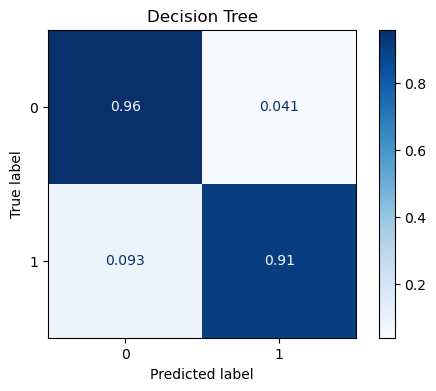

F:\a\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


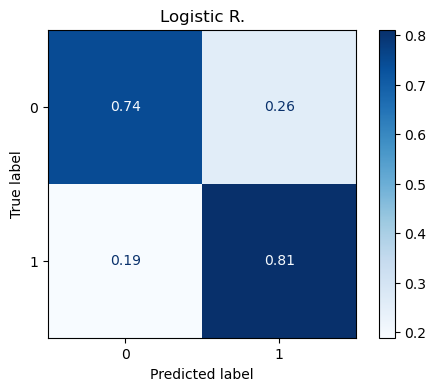

F:\a\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


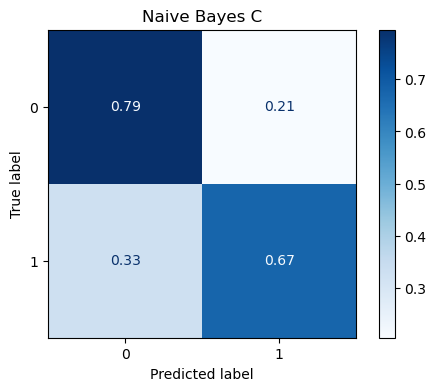

F:\a\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
F:\a\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


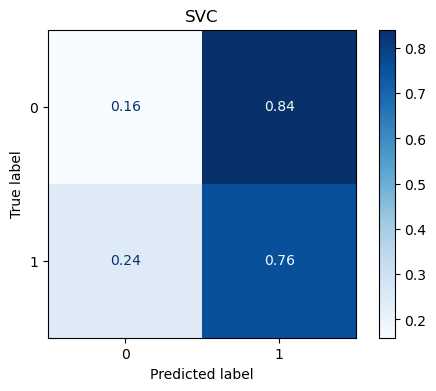

F:\a\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


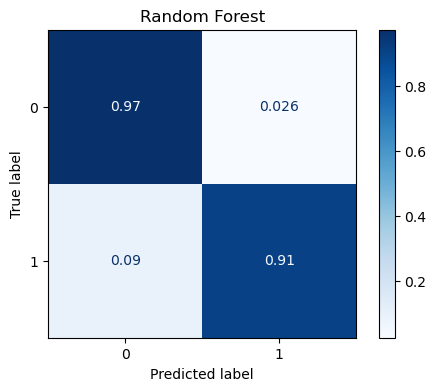

In [50]:
# plot the confusion matrix
test_models(X_train, X_test, y_train, y_test)

# Comparison between models

In [51]:
# Comparison between models by accuracy
results.sort_values('accuracy TP+TN)/all', ascending=False)

,Model,Recall TP/TP+FN,Precision TP/TP+FP,f1-score,accuracy TP+TN)/all
4,Random Forest,91.04,97.27,94.05,0.942419
0,Decision Tree,90.71,95.68,93.13,0.933097
1,Logistic R.,81.10,75.95,78.44,0.777117
2,Naive Bayes C,67.46,76.67,71.77,0.734664
3,SVC,75.55,47.34,58.21,0.457531


### The Random Forest model has the best accuracy but it takes the longest time compared to Decision Tree,The Decision Tree is the best model for accuracy and consumption of resources and time